# Running HDBSCAN on different combinations of abundances

In [4]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table, join, Column
from sklearn.cluster import HDBSCAN
from sklearn.preprocessing import StandardScaler

In [6]:
apogee = Table.read("/Users/chloerenard-robins/Downloads/allStar-dr17-synspec_rev1.fits")[0:50000]

In [7]:
apogee

FILE,APOGEE_ID,TARGET_ID,APSTAR_ID,ASPCAP_ID,TELESCOPE,LOCATION_ID,FIELD,ALT_ID,RA,DEC,GLON,GLAT,J,J_ERR,H,H_ERR,K,K_ERR,SRC_H,WASH_M,WASH_M_ERR,WASH_T2,WASH_T2_ERR,DDO51,DDO51_ERR,IRAC_3_6,IRAC_3_6_ERR,IRAC_4_5,IRAC_4_5_ERR,IRAC_5_8,IRAC_5_8_ERR,IRAC_8_0,IRAC_8_0_ERR,WISE_4_5,WISE_4_5_ERR,TARG_4_5,TARG_4_5_ERR,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,TARG_PMRA,TARG_PMDEC,TARG_PM_SRC,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,APOGEE2_TARGET4,TARGFLAGS,SURVEY,PROGRAMNAME,NVISITS,SNR,SNREV,STARFLAG,STARFLAGS,ANDFLAG,ANDFLAGS,VHELIO_AVG,VSCATTER,VERR,RV_TEFF,RV_LOGG,RV_FEH,RV_ALPHA,RV_CARB,RV_CHI2,RV_CCFWHM,RV_AUTOFWHM,RV_FLAG,N_COMPONENTS,MEANFIB,SIGFIB,MIN_H,MAX_H,MIN_JK,MAX_JK,GAIAEDR3_SOURCE_ID,GAIAEDR3_PARALLAX,GAIAEDR3_PARALLAX_ERROR,GAIAEDR3_PMRA,GAIAEDR3_PMRA_ERROR,GAIAEDR3_PMDEC,GAIAEDR3_PMDEC_ERROR,GAIAEDR3_PHOT_G_MEAN_MAG,GAIAEDR3_PHOT_BP_MEAN_MAG,GAIAEDR3_PHOT_RP_MEAN_MAG,GAIAEDR3_DR2_RADIAL_VELOCITY,GAIAEDR3_DR2_RADIAL_VELOCITY_ERROR,GAIAEDR3_R_MED_GEO,GAIAEDR3_R_LO_GEO,GAIAEDR3_R_HI_GEO,GAIAEDR3_R_MED_PHOTOGEO,GAIAEDR3_R_LO_PHOTOGEO,GAIAEDR3_R_HI_PHOTOGEO,ASPCAP_GRID,FPARAM_GRID,CHI2_GRID,FPARAM,FPARAM_COV,ASPCAP_CHI2,PARAM,PARAM_COV,PARAMFLAG,ASPCAPFLAG,ASPCAPFLAGS,FRAC_BADPIX,FRAC_LOWSNR,FRAC_SIGSKY,FELEM,FELEM_ERR,X_H,X_H_ERR,X_M,X_M_ERR,ELEM_CHI2,ELEMFRAC,ELEMFLAG,EXTRATARG,MEMBERFLAG,MEMBER,X_H_SPEC,X_M_SPEC,TEFF,TEFF_ERR,LOGG,LOGG_ERR,M_H,M_H_ERR,ALPHA_M,ALPHA_M_ERR,VMICRO,VMACRO,VSINI,TEFF_SPEC,LOGG_SPEC,C_FE,C_FE_SPEC,C_FE_ERR,C_FE_FLAG,CI_FE,CI_FE_SPEC,CI_FE_ERR,CI_FE_FLAG,N_FE,N_FE_SPEC,N_FE_ERR,N_FE_FLAG,O_FE,O_FE_SPEC,O_FE_ERR,O_FE_FLAG,NA_FE,NA_FE_SPEC,NA_FE_ERR,NA_FE_FLAG,MG_FE,MG_FE_SPEC,MG_FE_ERR,MG_FE_FLAG,AL_FE,AL_FE_SPEC,AL_FE_ERR,AL_FE_FLAG,SI_FE,SI_FE_SPEC,SI_FE_ERR,SI_FE_FLAG,P_FE,P_FE_SPEC,P_FE_ERR,P_FE_FLAG,S_FE,S_FE_SPEC,S_FE_ERR,S_FE_FLAG,K_FE,K_FE_SPEC,K_FE_ERR,K_FE_FLAG,CA_FE,CA_FE_SPEC,CA_FE_ERR,CA_FE_FLAG,TI_FE,TI_FE_SPEC,TI_FE_ERR,TI_FE_FLAG,TIII_FE,TIII_FE_SPEC,TIII_FE_ERR,TIII_FE_FLAG,V_FE,V_FE_SPEC,V_FE_ERR,V_FE_FLAG,CR_FE,CR_FE_SPEC,CR_FE_ERR,CR_FE_FLAG,MN_FE,MN_FE_SPEC,MN_FE_ERR,MN_FE_FLAG,FE_H,FE_H_SPEC,FE_H_ERR,FE_H_FLAG,CO_FE,CO_FE_SPEC,CO_FE_ERR,CO_FE_FLAG,NI_FE,NI_FE_SPEC,NI_FE_ERR,NI_FE_FLAG,CU_FE,CU_FE_SPEC,CU_FE_ERR,CU_FE_FLAG,CE_FE,CE_FE_SPEC,CE_FE_ERR,CE_FE_FLAG,YB_FE,YB_FE_SPEC,YB_FE_ERR,YB_FE_FLAG,VISIT_PK
bytes64,bytes30,bytes58,bytes71,bytes77,bytes6,int32,bytes20,bytes30,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,bytes16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,float32,float32,bytes16,float32,bytes32,float32,float32,int32,int32,int32,int32,int32,int32,bytes132,bytes32,bytes32,int32,float32,float32,int64,bytes132,int64,bytes132,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes8,"float32[21,9]",float32[21],float32[9],"float32[9,9]",float32,float32[9],"float32[9,9]",int64[9],int64,bytes256,float32,float32,float32,float32[27],float64[27],float32[27],float32[27],float32[27],float32[27],float32[27],float32[27],int64[27],int32,int64,bytes10,float32[27],float32[27],float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,

In [10]:
good = np.where((apogee['FE_H_FLAG'] == 0) & (apogee['N_FE_FLAG'] == 0) & (apogee['C_FE_FLAG'] == 0) & (apogee['MG_FE_FLAG'] == 0)
       & (apogee['SNR'] > 100) & (apogee['MN_FE_FLAG'] == 0) & (apogee['AL_FE_FLAG'] == 0) & (apogee['FE_H'] > -.5))
# we select the lines from the data table where the flags for certain concentrations is 0
print(good)

(array([    0,     6,     9, ..., 49984, 49994, 49999]),)


In [12]:
apogee_dynamics = Table.read("/Users/chloerenard-robins/Downloads/allStar-dr17-synspec_rev1-GaiaDR3-EDR3_STARHORSE_v2-MilkyWayPotential2022-staeckel.fits")

In [14]:
apogee_dynamics

APOGEE_ID,E,L,R_guide,actions,angles,ecc,freqs,r_apo,r_per,vxyz,xyz,z_max
,km2 / s2,km kpc / s,,km kpc / s,rad,,rad / Gyr,kpc,kpc,km / s,kpc,kpc
bytes30,float64,float64[3],float64,float64[3],float64[3],float64,float64[3],float64,float64,float64[3],float64[3],float64
2M00000002+7417074,-123176.07979245453,0.005332050034106583 .. -2046.5838322439306,8.981668407376421,15.027405298039879 .. 7.525041764412172,2.4517354987016615 .. 1.2614036778535578,0.10297209999893168,34.74373374623171 .. 50.16480912090879,10.072937056251236,8.192143368287141,32.17006543734355 .. 4.171636713847527,-9.591037481110748 .. 0.5831498458401123,0.5422632648270875
2M00000032+5737103,-124466.03209829744,0.38902235337252816 .. -2031.1545740481165,8.898810748496132,1.3763277789454367 .. 0.06642577657142772,6.0325931226431315 .. 4.387538032254313,0.031460429601664126,35.829428398454986 .. 74.90355228702998,9.187060151682811,8.626633690611706,21.148432173493827 .. -1.087941659945494,-8.608819214031442 .. -0.038995646895186295,0.04250520781746949
2M00000035-7323394,-84000.98738938406,-2378.1042834455034 .. 1693.9396569654339,8.05641926174822,1015.9105780117899 .. 1586.5312488529134,3.146059105827909 .. 5.230706242869177,0.5630916128299384,13.102987260372734 .. 9.380281701369695,33.797901578675464,9.447038514740054,86.03257867952993 .. 40.71649668199107,8.098176569914695 .. -25.15128132624195,17.557652313930422
2M00000068+5710233,-124673.56940567492,17.765703285273432 .. -1997.4216552046394,8.748109800269516,2.801281802955461 .. 10.824420519661423,0.839796371254334 .. 3.1059404283146126,0.045083294130352114,36.00465978483185 .. 49.17881724377112,9.26074438799551,8.461755703639152,6.1163193711018495 .. -35.851880321099316,-8.582580917795715 .. -0.039869741699358516,0.6575890874074756
2M00000103+1525513,-125511.57398407787,-3.654749398630969 .. -1975.8056724282358,8.644169205105664,5.7908754047704445 .. 3.5795984135099714,5.39573416993942 .. 5.116244026245846,0.06517087639520976,36.74610053287632 .. 61.707869990385355,9.27805415797212,8.14272660796705,25.875549000924998 .. 5.229456013679443,-8.362171341757834 .. -0.3187922665548954,0.3382538301485445
2M00000133+5721163,-117047.40862430292,-3.22350486769144 .. -2263.494436673958,10.038529626500342,32.00881083540697 .. 23.258579016654956,3.062763970234418 .. 5.951600152147872,0.14216037367857093,29.909819183090317 .. 32.996840114510945,11.873572683453745,8.917855485626177,77.60631006389502 .. 32.36250361889193,-10.741430844902807 .. -0.4474612329410487,1.1740842500249018
2M00000211+6327470,-114143.26197387936,0.7813543685804133 .. -2434.349282348719,10.859644785708866,32.42741326647552 .. 4.254625958174971,3.099595155930186 .. 2.8451731306915606,0.13920638680024056,27.823613938148544 .. 39.57778496606091,12.613010956885276,9.530493684643675,86.45815790246833 .. -15.601497561482844,-11.228632779684258 .. 0.1591835257016006,0.45940811215604493
2M00000222+5625359,-123379.87912961027,3.90424943864215 .. -2067.7905721515644,9.072854047199167,0.8199014191579667 .. 2.839165731317756,3.2488663751814078 .. 3.7224789513077665,0.02408118529485382,34.89150989663209 .. 59.28344410750599,9.324847812350633,8.886301745417718,43.82263409464202 .. -14.661471366659304,-9.146563810924086 .. -0.1777790584480245,0.3086064493939563


#### joining the spectroscopic and dynamical data

In [17]:
# joins the HDBSCAN output table and the dynamics table by identifying the cluster by its Apogee ID
spectroscopy_dynamics_joined = join (apogee[good],apogee_dynamics, keys='APOGEE_ID', join_type='inner') 

In [19]:
spectroscopy_dynamics_joined

FILE,APOGEE_ID,TARGET_ID,APSTAR_ID,ASPCAP_ID,TELESCOPE,LOCATION_ID,FIELD,ALT_ID,RA,DEC,GLON,GLAT,J,J_ERR,H,H_ERR,K,K_ERR,SRC_H,WASH_M,WASH_M_ERR,WASH_T2,WASH_T2_ERR,DDO51,DDO51_ERR,IRAC_3_6,IRAC_3_6_ERR,IRAC_4_5,IRAC_4_5_ERR,IRAC_5_8,IRAC_5_8_ERR,IRAC_8_0,IRAC_8_0_ERR,WISE_4_5,WISE_4_5_ERR,TARG_4_5,TARG_4_5_ERR,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,TARG_PMRA,TARG_PMDEC,TARG_PM_SRC,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,APOGEE2_TARGET4,TARGFLAGS,SURVEY,PROGRAMNAME,NVISITS,SNR,SNREV,STARFLAG,STARFLAGS,ANDFLAG,ANDFLAGS,VHELIO_AVG,VSCATTER,VERR,RV_TEFF,RV_LOGG,RV_FEH,RV_ALPHA,RV_CARB,RV_CHI2,RV_CCFWHM,RV_AUTOFWHM,RV_FLAG,N_COMPONENTS,MEANFIB,SIGFIB,MIN_H,MAX_H,MIN_JK,MAX_JK,GAIAEDR3_SOURCE_ID,GAIAEDR3_PARALLAX,GAIAEDR3_PARALLAX_ERROR,GAIAEDR3_PMRA,GAIAEDR3_PMRA_ERROR,GAIAEDR3_PMDEC,GAIAEDR3_PMDEC_ERROR,GAIAEDR3_PHOT_G_MEAN_MAG,GAIAEDR3_PHOT_BP_MEAN_MAG,GAIAEDR3_PHOT_RP_MEAN_MAG,GAIAEDR3_DR2_RADIAL_VELOCITY,GAIAEDR3_DR2_RADIAL_VELOCITY_ERROR,GAIAEDR3_R_MED_GEO,GAIAEDR3_R_LO_GEO,GAIAEDR3_R_HI_GEO,GAIAEDR3_R_MED_PHOTOGEO,GAIAEDR3_R_LO_PHOTOGEO,GAIAEDR3_R_HI_PHOTOGEO,ASPCAP_GRID,FPARAM_GRID,CHI2_GRID,FPARAM,FPARAM_COV,ASPCAP_CHI2,PARAM,PARAM_COV,PARAMFLAG,ASPCAPFLAG,ASPCAPFLAGS,FRAC_BADPIX,FRAC_LOWSNR,FRAC_SIGSKY,FELEM,FELEM_ERR,X_H,X_H_ERR,X_M,X_M_ERR,ELEM_CHI2,ELEMFRAC,ELEMFLAG,EXTRATARG,MEMBERFLAG,MEMBER,X_H_SPEC,X_M_SPEC,TEFF,TEFF_ERR,LOGG,LOGG_ERR,M_H,M_H_ERR,ALPHA_M,ALPHA_M_ERR,VMICRO,VMACRO,VSINI,TEFF_SPEC,LOGG_SPEC,C_FE,C_FE_SPEC,C_FE_ERR,C_FE_FLAG,CI_FE,CI_FE_SPEC,CI_FE_ERR,CI_FE_FLAG,N_FE,N_FE_SPEC,N_FE_ERR,N_FE_FLAG,O_FE,O_FE_SPEC,O_FE_ERR,O_FE_FLAG,NA_FE,NA_FE_SPEC,NA_FE_ERR,NA_FE_FLAG,MG_FE,MG_FE_SPEC,MG_FE_ERR,MG_FE_FLAG,AL_FE,AL_FE_SPEC,AL_FE_ERR,AL_FE_FLAG,SI_FE,SI_FE_SPEC,SI_FE_ERR,SI_FE_FLAG,P_FE,P_FE_SPEC,P_FE_ERR,P_FE_FLAG,S_FE,S_FE_SPEC,S_FE_ERR,S_FE_FLAG,K_FE,K_FE_SPEC,K_FE_ERR,K_FE_FLAG,CA_FE,CA_FE_SPEC,CA_FE_ERR,CA_FE_FLAG,TI_FE,TI_FE_SPEC,TI_FE_ERR,TI_FE_FLAG,TIII_FE,TIII_FE_SPEC,TIII_FE_ERR,TIII_FE_FLAG,V_FE,V_FE_SPEC,V_FE_ERR,V_FE_FLAG,CR_FE,CR_FE_SPEC,CR_FE_ERR,CR_FE_FLAG,MN_FE,MN_FE_SPEC,MN_FE_ERR,MN_FE_FLAG,FE_H,FE_H_SPEC,FE_H_ERR,FE_H_FLAG,CO_FE,CO_FE_SPEC,CO_FE_ERR,CO_FE_FLAG,NI_FE,NI_FE_SPEC,NI_FE_ERR,NI_FE_FLAG,CU_FE,CU_FE_SPEC,CU_FE_ERR,CU_FE_FLAG,CE_FE,CE_FE_SPEC,CE_FE_ERR,CE_FE_FLAG,YB_FE,YB_FE_SPEC,YB_FE_ERR,YB_FE_FLAG,VISIT_PK,E,L,R_guide,actions,angles,ecc,freqs,r_apo,r_per,vxyz,xyz,z_max
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,km2 / s2,km kpc / s,,km kpc / s,rad,,rad / Gyr,kpc,kpc,km / s,kpc,kpc
bytes64,bytes30,bytes58,bytes71,bytes77,bytes6,int32,bytes20,bytes30,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,bytes16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,float32,float32,bytes16,float32,bytes32,float32,float32,int32,int32,int32,int32,int32,int32,bytes132,bytes32,bytes32,int32,float32,float32,int64,bytes132,int64,bytes132,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes8,"float32[21,9]",float32[21],float32[9],"float32[9,9]",float32,float32[9],"float32[9,9]",int64[9],int64,bytes256,float32,float32,float32,float32[27],float64[27],float32[27],float32[27],float32[27],float32[27],float32[27],float32[27],int64[27],int32,int64,bytes10,float32[27],float32[27],float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float3

In [21]:
# turns the data within the action and L columns into arrays
actions_arr = np.array(spectroscopy_dynamics_joined['actions'].tolist())
L_arr = np.array(spectroscopy_dynamics_joined['L'].tolist())

# creates seperate columns for each of the actions
action_names = ['J_R', 'L_z', 'J_z'] 
for i, name in enumerate(action_names): # iterates through each value in the action column, associating it to the right column by its index
    col = Column(actions_arr[:, i], name=name)
    if name in spectroscopy_dynamics_joined.colnames: # accounts for the case where the column with the given name already exists
        spectroscopy_dynamics_joined.replace_column(name, col)
    else:
        spectroscopy_dynamics_joined.add_column(col)

# creates seperate columns for each of the L values
L_names = ['L_x', 'L_y', 'L_z']
for i, name in enumerate(L_names):
    col = Column(L_arr[:, i], name=name)
    if name in spectroscopy_dynamics_joined.colnames:
        spectroscopy_dynamics_joined.replace_column(name, col)
    else:
        spectroscopy_dynamics_joined.add_column(col)

# removes original columns
spectroscopy_dynamics_joined.remove_column('actions')
spectroscopy_dynamics_joined.remove_column('L')

spectroscopy_dynamics_joined

FILE,APOGEE_ID,TARGET_ID,APSTAR_ID,ASPCAP_ID,TELESCOPE,LOCATION_ID,FIELD,ALT_ID,RA,DEC,GLON,GLAT,J,J_ERR,H,H_ERR,K,K_ERR,SRC_H,WASH_M,WASH_M_ERR,WASH_T2,WASH_T2_ERR,DDO51,DDO51_ERR,IRAC_3_6,IRAC_3_6_ERR,IRAC_4_5,IRAC_4_5_ERR,IRAC_5_8,IRAC_5_8_ERR,IRAC_8_0,IRAC_8_0_ERR,WISE_4_5,WISE_4_5_ERR,TARG_4_5,TARG_4_5_ERR,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,TARG_PMRA,TARG_PMDEC,TARG_PM_SRC,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,APOGEE2_TARGET4,TARGFLAGS,SURVEY,PROGRAMNAME,NVISITS,SNR,SNREV,STARFLAG,STARFLAGS,ANDFLAG,ANDFLAGS,VHELIO_AVG,VSCATTER,VERR,RV_TEFF,RV_LOGG,RV_FEH,RV_ALPHA,RV_CARB,RV_CHI2,RV_CCFWHM,RV_AUTOFWHM,RV_FLAG,N_COMPONENTS,MEANFIB,SIGFIB,MIN_H,MAX_H,MIN_JK,MAX_JK,GAIAEDR3_SOURCE_ID,GAIAEDR3_PARALLAX,GAIAEDR3_PARALLAX_ERROR,GAIAEDR3_PMRA,GAIAEDR3_PMRA_ERROR,GAIAEDR3_PMDEC,GAIAEDR3_PMDEC_ERROR,GAIAEDR3_PHOT_G_MEAN_MAG,GAIAEDR3_PHOT_BP_MEAN_MAG,GAIAEDR3_PHOT_RP_MEAN_MAG,GAIAEDR3_DR2_RADIAL_VELOCITY,GAIAEDR3_DR2_RADIAL_VELOCITY_ERROR,GAIAEDR3_R_MED_GEO,GAIAEDR3_R_LO_GEO,GAIAEDR3_R_HI_GEO,GAIAEDR3_R_MED_PHOTOGEO,GAIAEDR3_R_LO_PHOTOGEO,GAIAEDR3_R_HI_PHOTOGEO,ASPCAP_GRID,FPARAM_GRID,CHI2_GRID,FPARAM,FPARAM_COV,ASPCAP_CHI2,PARAM,PARAM_COV,PARAMFLAG,ASPCAPFLAG,ASPCAPFLAGS,FRAC_BADPIX,FRAC_LOWSNR,FRAC_SIGSKY,FELEM,FELEM_ERR,X_H,X_H_ERR,X_M,X_M_ERR,ELEM_CHI2,ELEMFRAC,ELEMFLAG,EXTRATARG,MEMBERFLAG,MEMBER,X_H_SPEC,X_M_SPEC,TEFF,TEFF_ERR,LOGG,LOGG_ERR,M_H,M_H_ERR,ALPHA_M,ALPHA_M_ERR,VMICRO,VMACRO,VSINI,TEFF_SPEC,LOGG_SPEC,C_FE,C_FE_SPEC,C_FE_ERR,C_FE_FLAG,CI_FE,CI_FE_SPEC,CI_FE_ERR,CI_FE_FLAG,N_FE,N_FE_SPEC,N_FE_ERR,N_FE_FLAG,O_FE,O_FE_SPEC,O_FE_ERR,O_FE_FLAG,NA_FE,NA_FE_SPEC,NA_FE_ERR,NA_FE_FLAG,MG_FE,MG_FE_SPEC,MG_FE_ERR,MG_FE_FLAG,AL_FE,AL_FE_SPEC,AL_FE_ERR,AL_FE_FLAG,SI_FE,SI_FE_SPEC,SI_FE_ERR,SI_FE_FLAG,P_FE,P_FE_SPEC,P_FE_ERR,P_FE_FLAG,S_FE,S_FE_SPEC,S_FE_ERR,S_FE_FLAG,K_FE,K_FE_SPEC,K_FE_ERR,K_FE_FLAG,CA_FE,CA_FE_SPEC,CA_FE_ERR,CA_FE_FLAG,TI_FE,TI_FE_SPEC,TI_FE_ERR,TI_FE_FLAG,TIII_FE,TIII_FE_SPEC,TIII_FE_ERR,TIII_FE_FLAG,V_FE,V_FE_SPEC,V_FE_ERR,V_FE_FLAG,CR_FE,CR_FE_SPEC,CR_FE_ERR,CR_FE_FLAG,MN_FE,MN_FE_SPEC,MN_FE_ERR,MN_FE_FLAG,FE_H,FE_H_SPEC,FE_H_ERR,FE_H_FLAG,CO_FE,CO_FE_SPEC,CO_FE_ERR,CO_FE_FLAG,NI_FE,NI_FE_SPEC,NI_FE_ERR,NI_FE_FLAG,CU_FE,CU_FE_SPEC,CU_FE_ERR,CU_FE_FLAG,CE_FE,CE_FE_SPEC,CE_FE_ERR,CE_FE_FLAG,YB_FE,YB_FE_SPEC,YB_FE_ERR,YB_FE_FLAG,VISIT_PK,E,R_guide,angles,ecc,freqs,r_apo,r_per,vxyz,xyz,z_max,J_R,L_z,J_z,L_x,L_y
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,km2 / s2,,rad,,rad / Gyr,kpc,kpc,km / s,kpc,kpc,,,,,
bytes64,bytes30,bytes58,bytes71,bytes77,bytes6,int32,bytes20,bytes30,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,bytes16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,float32,float32,bytes16,float32,bytes32,float32,float32,int32,int32,int32,int32,int32,int32,bytes132,bytes32,bytes32,int32,float32,float32,int64,bytes132,int64,bytes132,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes8,"float32[21,9]",float32[21],float32[9],"float32[9,9]",float32,float32[9],"float32[9,9]",int64[9],int64,bytes256,float32,float32,float32,float32[27],float64[27],float32[27],float32[27],float32[27],float32[27],float32[27],float32[27],int64[27],int32,int64,bytes10,float32[27],float32[27],float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32

#### running HDBSCAN and dynamical spread analysis on different combinations of abundances

In [24]:
apogee_table_chunk_going_into_hdbscan = spectroscopy_dynamics_joined['FE_H','MG_FE','N_FE','C_FE','AL_FE', 'MN_FE', 'CE_FE']
abund_cols = ['FE_H','MG_FE','N_FE','C_FE','AL_FE', 'MN_FE', 'CE_FE'] # creates a list of the columns of abundances that will be used
label_col  = 'HDBSCAN_Cluster' # creates a column for the cluster group 
df = apogee_table_chunk_going_into_hdbscan.to_pandas().astype('float64')  # transforms table of columns that will run through HDBSCAN into a DataFrame

In [26]:
# creates a list of all of the different possible combinations of the seven abundances used
combos = (
    list(itertools.combinations(abund_cols, 2)) +  # all 2‑D combinations
    list(itertools.combinations(abund_cols, 3)) +  # all 3‑D combinations
    list(itertools.combinations(abund_cols, 4)) +  # all 4‑D combinations
    list(itertools.combinations(abund_cols, 5)) +  # all 5‑D combinations
    list(itertools.combinations(abund_cols, 6)) +  # all 6‑D combinations
    list(itertools.combinations(abund_cols, 7))    # all 7‑D combinations
)

In [28]:
mcs = 3 #this is what the other paper said
maxcs = 1222 # arbitrary
cse = 0.02

In [30]:
clusterers = {}  # creates a dictionary to hold each fitted HDBSCAN model 
cluster_labels_dict = {}  # creates a dictrionary to hold all new columns
spread_cols = ['E', 'R_guide', 'ecc', 'z_max', 'J_R', 'J_z', 'L_z', 'L_x', 'L_y'] # creates a list of the columns that will be used to calculate spread
spread_results = {} # creates a dictionary to hold the calculated results of the spreads

df_abund = apogee_table_chunk_going_into_hdbscan.to_pandas().astype('float64') # abundance DataFrame (used for clustering)

# dynamical DataFrame (used for spread analysis)
df_dyn = pd.DataFrame(
    {col: np.asarray(spectroscopy_dynamics_joined[col], dtype='float64') # turns each column into a numpy array and assigns each array to its corresponding key
     for col in spread_cols}, # loops through each column in spread_cols  
    index=np.arange(len(spectroscopy_dynamics_joined)) # ensures that the DataFrame has the same length as the astropy table
)
df_dyn['APOGEE_ID'] = spectroscopy_dynamics_joined['APOGEE_ID'] # adds a column to the DataaFrame for apogee id


for combo in combos: # loops over each tuple of abundances
    tag = '|'.join(combo) # joins the different abundances into a name with abundances seperated by |
    features = df_abund[list(combo)].to_numpy() # pulls only the relevent columns from df and turns it into a numpy array
    hdb = HDBSCAN(min_cluster_size=mcs, cluster_selection_epsilon = cse, max_cluster_size= maxcs) # configures a new HDBSCAN instance
    hdb.fit(features) # runs HDBSCAN
    labels = hdb.labels_.astype(int) 
    clusterers[tag] = hdb # saves the fitted model into the clusterers dictionary
    cluster_labels_dict[f'cluster_{tag}'] = labels # stores labels in the column dictionary
    dyn_tmp = df_dyn.copy() # compute average cluster size
    dyn_tmp['HDBSCAN_Cluster'] = labels # Merge cluster labels with dynamical data
    dyn_good = dyn_tmp[~dyn_tmp['HDBSCAN_Cluster'].isin([-1, -3])] # remove noise and outliers
    spread = dyn_good.groupby('HDBSCAN_Cluster')[spread_cols].std() # compute spread within each cluster
    spread_results[tag] = spread.mean()  # average spread per dynamical variable
cluster_df = pd.DataFrame(cluster_labels_dict, index=df.index) # creates a dataframe with every key in cluster_labels_dict as a column and the same index as df
df = pd.concat([df, cluster_df], axis=1) # attaches all new cluster columns to the main DataFrame
spread_summary = pd.DataFrame(spread_results).T  # rows = tags, cols = variables
spread_summary.reset_index(inplace=True)
spread_summary.rename(columns={'index': 'combo_tag'}, inplace=True)
spread_table = Table.from_pandas(spread_summary)

In [31]:
cluster_counts = {} # creates an empty dictionary that will map combo tag to the number of clusters

for tag in clusterers.keys(): # iterates over every abundance combo
    col = f'cluster_{tag}' # builds the dataframe column name
    unique_labels = pd.unique(df[col].values.ravel()) # grabs all the distinct label values that represent seperate clusters in that column 
    n_clusters = len(unique_labels[unique_labels >= 0])  # ignores all the values that are negative (-1 is noise)
    cluster_counts[tag] = n_clusters # saves the count of clusters to a dictionary

print("Clusters found per combo:")
for tag, n in cluster_counts.items(): # iterates over the dictionary
    print(f"{tag:<30}  {n:3d}") # prints the tags is a readable format (left aligns the tag in a 30 character field and shows the number of clusters as a three digit integer)

Clusters found per combo:
FE_H|MG_FE                        2
FE_H|N_FE                        22
FE_H|C_FE                        17
FE_H|AL_FE                       10
FE_H|MN_FE                        2
FE_H|CE_FE                       62
MG_FE|N_FE                       15
MG_FE|C_FE                       11
MG_FE|AL_FE                       8
MG_FE|MN_FE                       3
MG_FE|CE_FE                      40
N_FE|C_FE                        16
N_FE|AL_FE                       18
N_FE|MN_FE                        8
N_FE|CE_FE                       44
C_FE|AL_FE                       13
C_FE|MN_FE                        7
C_FE|CE_FE                       47
AL_FE|MN_FE                       9
AL_FE|CE_FE                      52
MN_FE|CE_FE                      33
FE_H|MG_FE|N_FE                 155
FE_H|MG_FE|C_FE                  79
FE_H|MG_FE|AL_FE                 93
FE_H|MG_FE|MN_FE                 32
FE_H|MG_FE|CE_FE                241
FE_H|N_FE|C_FE                  196
FE

In [34]:
tags    = list(cluster_counts.keys())          # abundance‑combo strings
n_clust = [cluster_counts[t] for t in tags]    # corresponding counts

results_tbl = Table(
    [tags, n_clust],
    names=('combo_tag', 'n_clusters')
)

In [38]:
results_tbl.pprint(max_lines=-1) # makes all lines visible
results_tbl.write('results_tbl_apogee.ecsv', format='ascii.ecsv', overwrite=True)

              combo_tag                n_clusters
-------------------------------------- ----------
                            FE_H|MG_FE          2
                             FE_H|N_FE         22
                             FE_H|C_FE         17
                            FE_H|AL_FE         10
                            FE_H|MN_FE          2
                            FE_H|CE_FE         62
                            MG_FE|N_FE         15
                            MG_FE|C_FE         11
                           MG_FE|AL_FE          8
                           MG_FE|MN_FE          3
                           MG_FE|CE_FE         40
                             N_FE|C_FE         16
                            N_FE|AL_FE         18
                            N_FE|MN_FE          8
                            N_FE|CE_FE         44
                            C_FE|AL_FE         13
                            C_FE|MN_FE          7
                            C_FE|CE_FE         47


In [40]:
average_cluster_sizes = {}  # combo tag → average size
outlier_counts = {}

for tag, hdb in clusterers.items():
    labels = hdb.labels_  # get cluster labels for this combo
    n_outlier = sum(labels == -1) # counts number of outliers 
    outlier_counts[tag] = n_outlier # stores the outlier count for a particular combination of abundances in a dictionary
    labels_cleaned = labels[labels != -1] # filters out noise 
    cluster_count = pd.Series(labels_cleaned).value_counts() # counts the number of stars in each cluster
    avg_size = cluster_count.mean() # computes the average number of stars in each cluster
    average_cluster_sizes[tag] = avg_size # stores the average cluster size for a particular combination of abundances in a dictionary

# convert to a table
combo_tags = list(average_cluster_sizes.keys())
avg_sizes = list(average_cluster_sizes.values())
outlier_number = list(outlier_counts.values())

# creates pandas DataFrame
avg_size_outlier_df = pd.DataFrame({
    'Abundance_Combination': combo_tags,
    'Average_Cluster_Size': avg_sizes,
    'Number_Outliers': outlier_number
})
# converts to Astropy Table
avg_size_outlier_table = Table.from_pandas(avg_size_outlier_df)

In [41]:
avg_size_outlier_table.pprint(max_lines=-1) # makes all lines visible

        Abundance_Combination          Average_Cluster_Size Number_Outliers
-------------------------------------- -------------------- ---------------
                            FE_H|MG_FE               6786.5              51
                             FE_H|N_FE    615.7272727272727              78
                             FE_H|C_FE    796.3529411764706              86
                            FE_H|AL_FE               1353.7              87
                            FE_H|MN_FE               6779.0              66
                            FE_H|CE_FE                213.0             205
                            MG_FE|N_FE                903.8              67
                            MG_FE|C_FE               1233.0              61
                           MG_FE|AL_FE               1696.0              56
                           MG_FE|MN_FE               4535.0              19
                           MG_FE|CE_FE    328.7317073170732             146
            

In [44]:
avg_size_outlier_table

Abundance_Combination,Average_Cluster_Size,Number_Outliers
str38,float64,int64
FE_H|MG_FE,6786.5,51
FE_H|N_FE,615.7272727272727,78
FE_H|C_FE,796.3529411764706,86
FE_H|AL_FE,1353.7,87
FE_H|MN_FE,6779.0,66
FE_H|CE_FE,213.0,205
MG_FE|N_FE,903.8,67
MG_FE|C_FE,1233.0,61
MG_FE|AL_FE,1696.0,56


In [46]:
avg_size_outlier_table.write('avg_size_outlier_table_apogee.ecsv', format='ascii.ecsv', overwrite=True)

In [48]:
spread_table # prints the spread data as an astropy table

combo_tag,E,R_guide,ecc,z_max,J_R,J_z,L_z,L_x,L_y
str38,float64,float64,float64,float64,float64,float64,float64,float64,float64
FE_H|MG_FE,5767.720476432563,1.2787439430950769,0.07102145202257872,0.4127294526334384,38.04842638538085,15.09507107607359,270.2046602551089,13.76624162022542,13.811099193253556
FE_H|N_FE,6375.887086389153,1.4186765958657819,0.08157001879988492,0.3486657803376063,49.88105291594973,11.135282651157418,294.89741538269925,10.260526400182771,8.843002055385638
FE_H|C_FE,7110.96628706837,1.5978609580374519,0.07404348140968817,0.45258617108487165,54.90602517451774,16.267092086376866,329.40843811910673,12.080658166733397,12.190733675301695
FE_H|AL_FE,5861.713919576598,1.36947899230754,0.1061020011004298,0.32129827379128356,59.700485380843155,12.963192702311309,298.3976102305738,13.901283126200184,13.001072622970128
FE_H|MN_FE,6483.185755403184,1.3632687413553342,0.0787298159275632,0.4486949178718579,42.455724221242846,14.734761886617207,285.2969181218773,13.21435520873982,11.037218000489144
FE_H|CE_FE,7470.064790439575,1.6874145091607473,0.09034482255202582,0.5663153588373727,50.26102451985976,20.370810658356277,353.3476373016564,18.641962329651076,18.553782975209785
MG_FE|N_FE,8436.309686069335,1.8204504322838955,0.09127993474827956,0.5695723351844616,71.50550880606822,23.097351900901923,378.0283776017534,24.06393179214111,22.468766598121256
MG_FE|C_FE,6605.77046784304,1.5213542461938152,0.0892381366127284,0.5961409371168466,74.02625233648726,22.561992695932783,310.88375953430074,12.105180294296941,21.09758184599642
MG_FE|AL_FE,6115.508888567066,1.397846889179445,0.08298090461364424,0.46202523484417213,40.117946980806586,14.790114352032933,298.19005577839425,14.03874720988377,13.613632821109794


In [50]:
spread_table.write('spread_table_apogee.ecsv', format='ascii.ecsv', overwrite=True)

#### plot of results

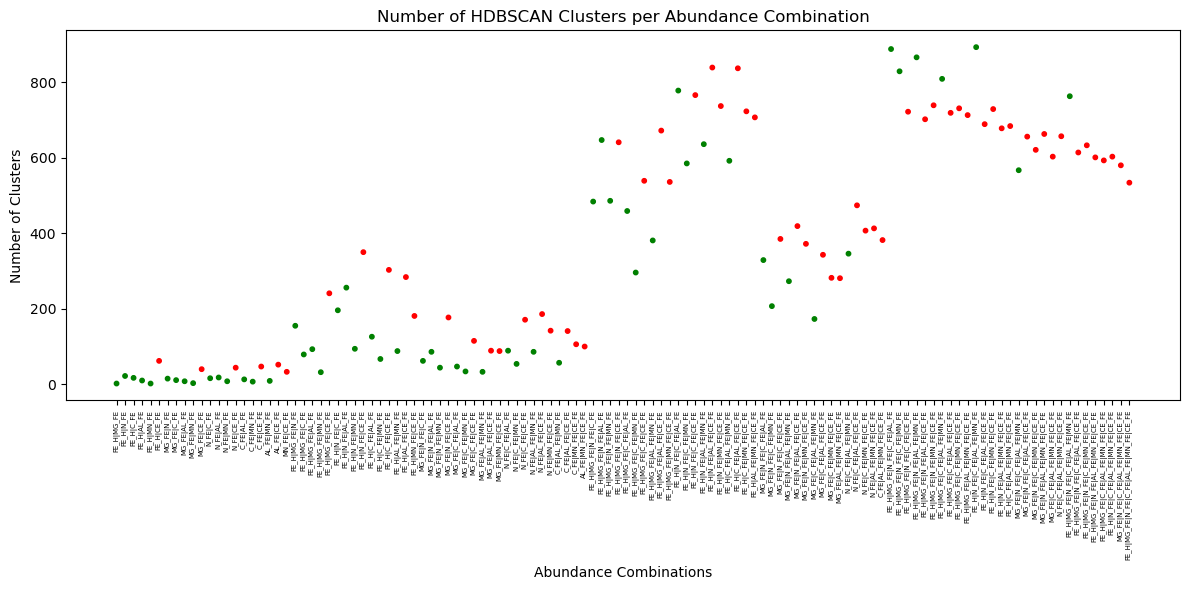

In [93]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy.polynomial.polynomial import Polynomial

x_labels = list(cluster_counts.keys()) # assigns the names of combinations of abundances as the x-axis
y_values = np.array(list(cluster_counts.values()))

point_colors = ['red' if 'CE_FE' in tag else 'green' for tag in x_labels] # color list so the dot is red if 'CE_FE' in tag, else green

# creates the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(x_labels, y_values, color=point_colors, s=10)

plt.xticks(rotation=90, fontsize=5) # improves readability of long x-axis labels by rotating 90 degrees and shrinking font size
plt.xlabel("Abundance Combinations")
plt.ylabel("Number of Clusters")
plt.title("Number of HDBSCAN Clusters per Abundance Combination")
plt.tight_layout()

plt.show()


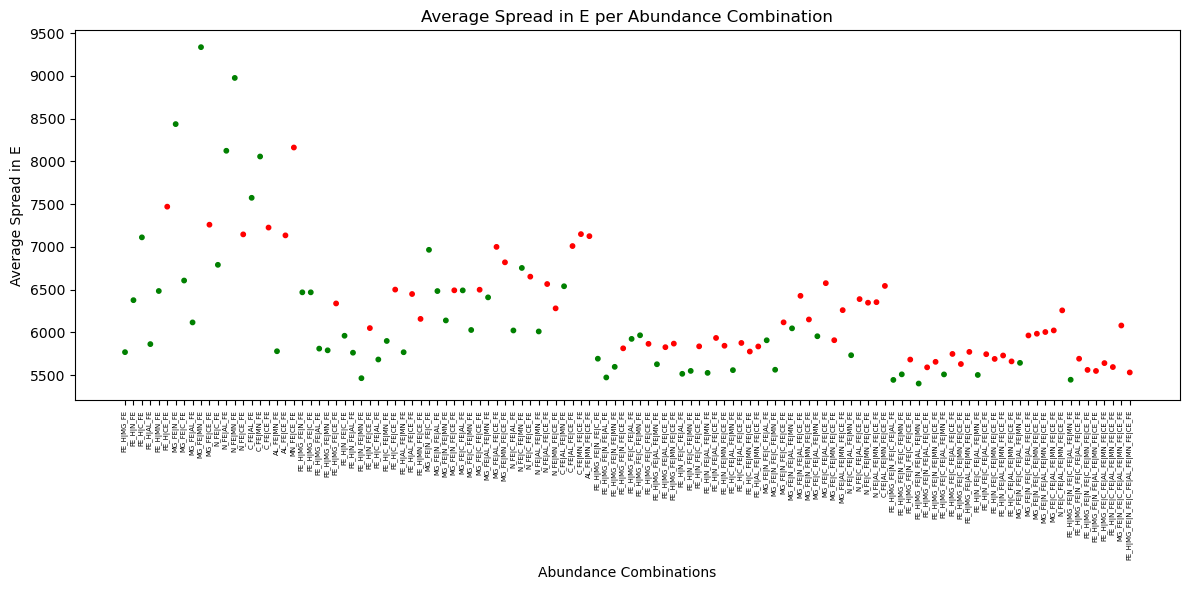

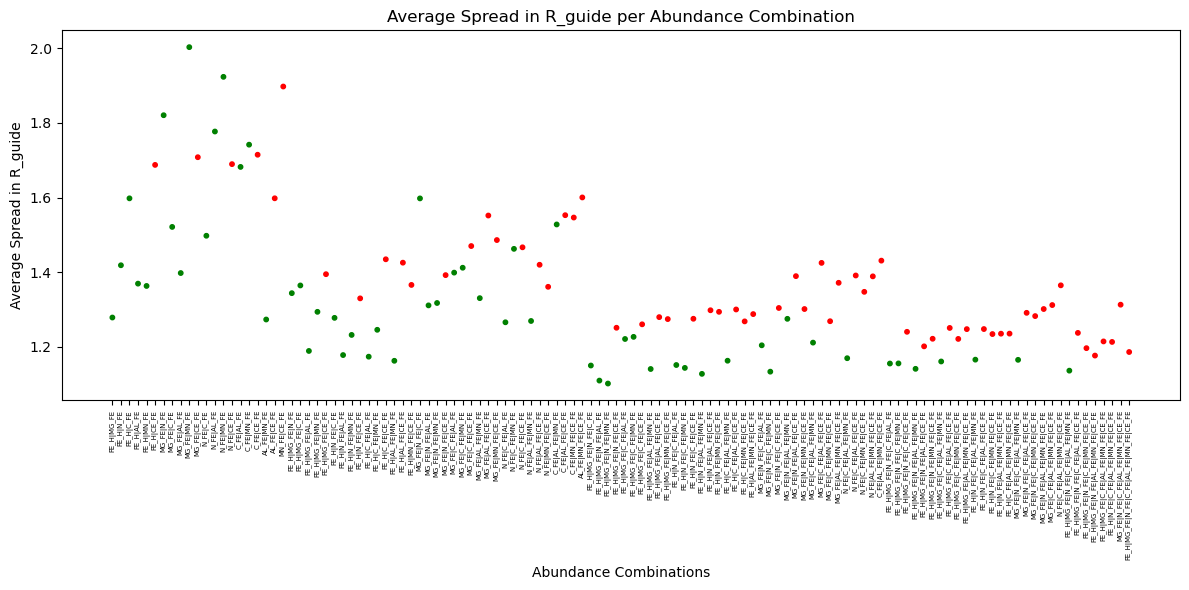

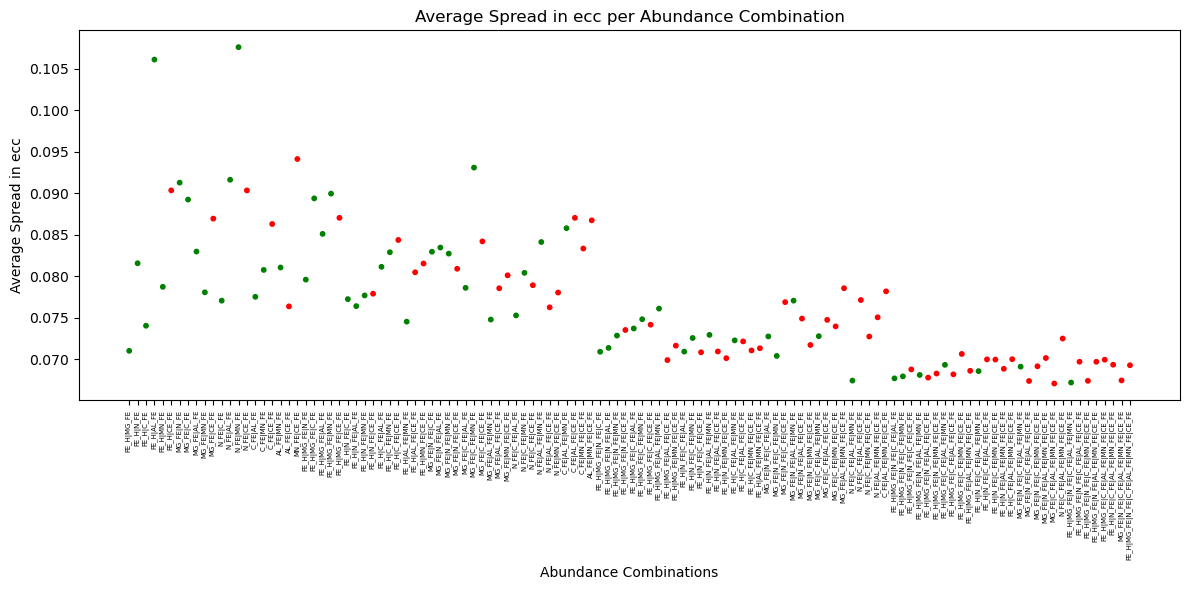

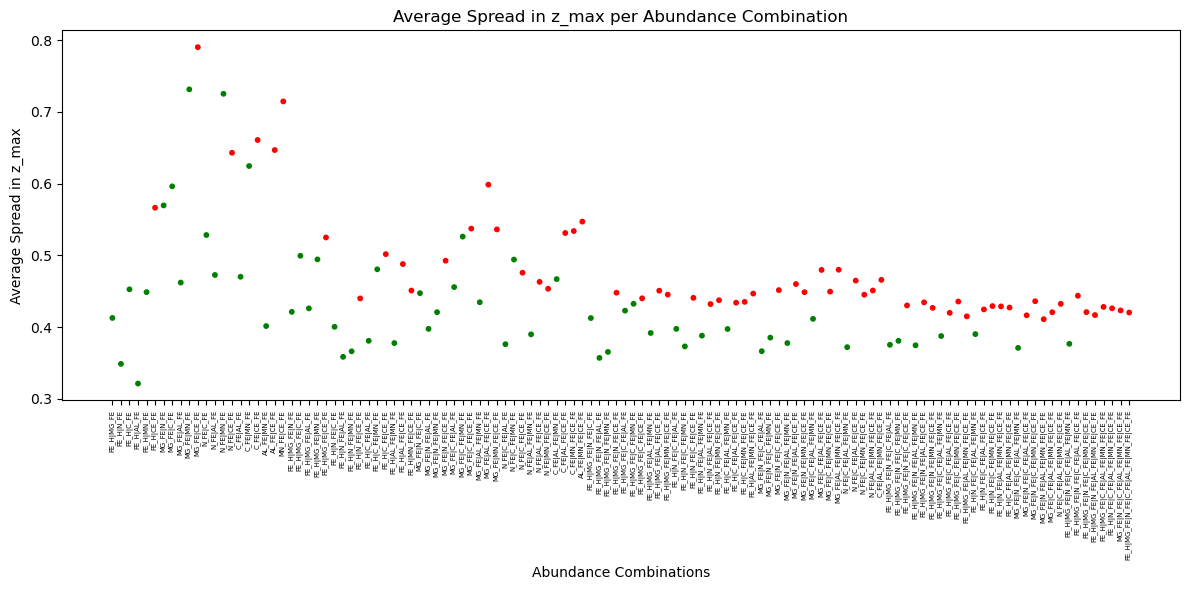

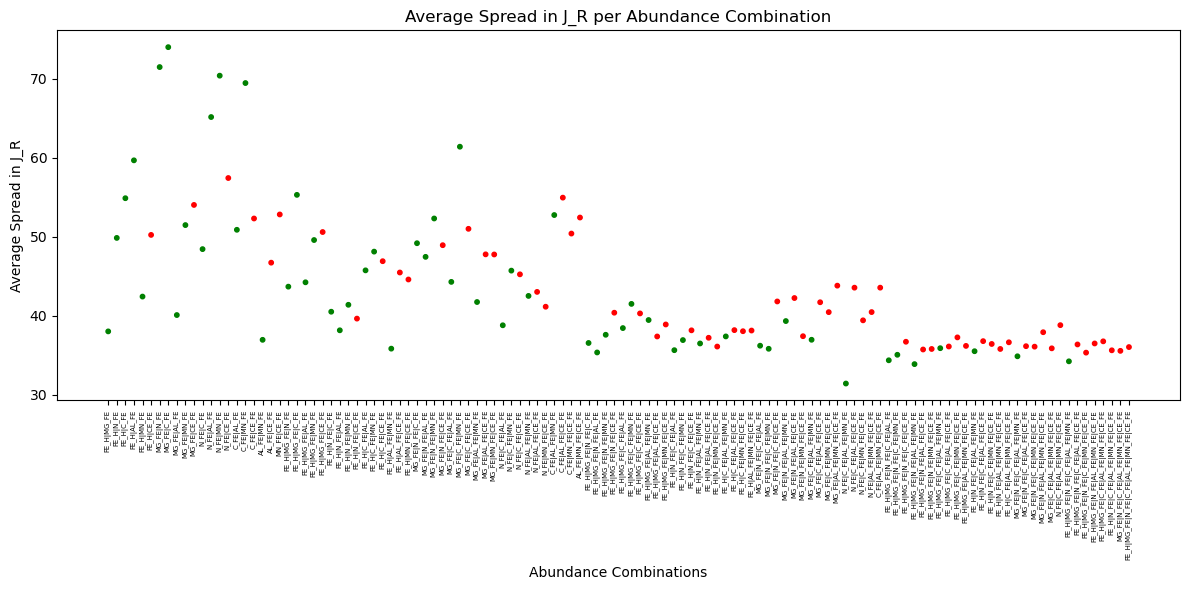

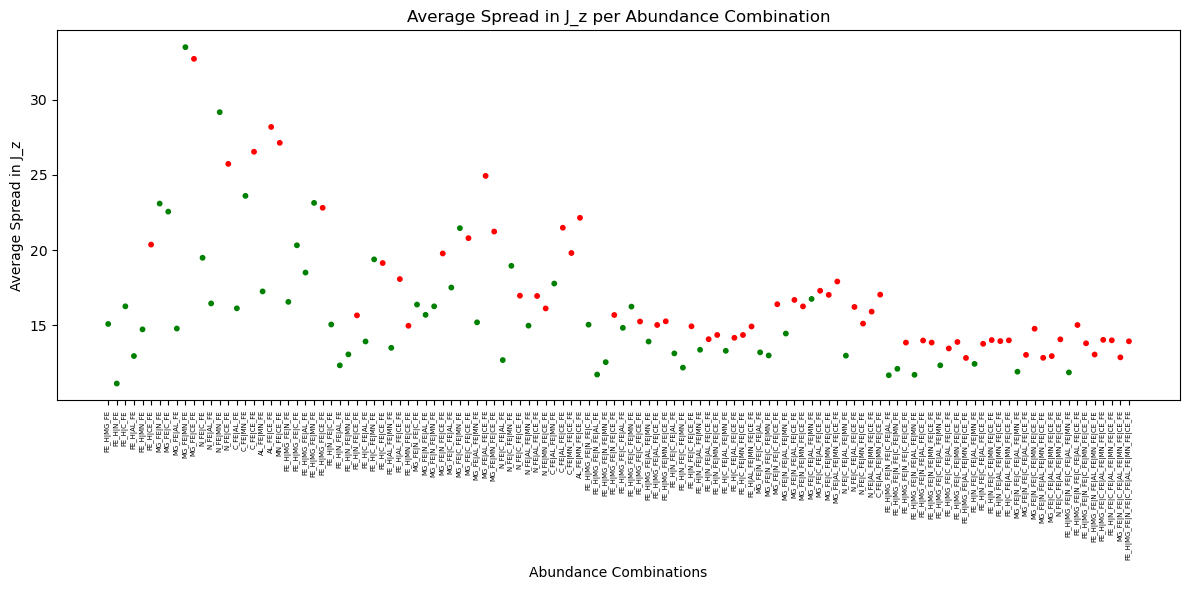

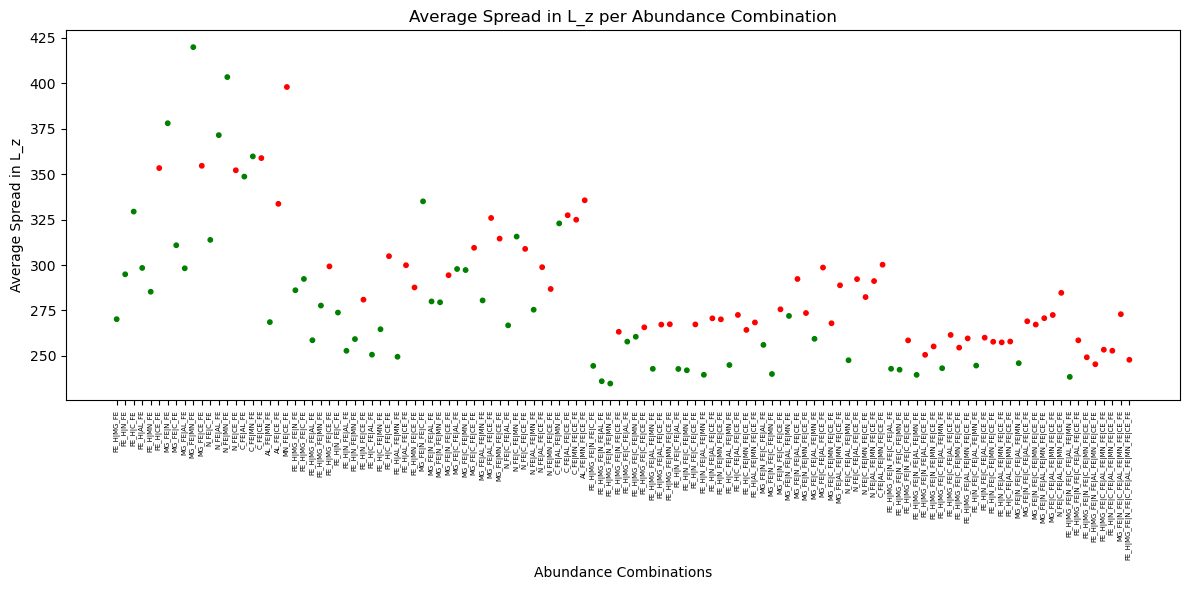

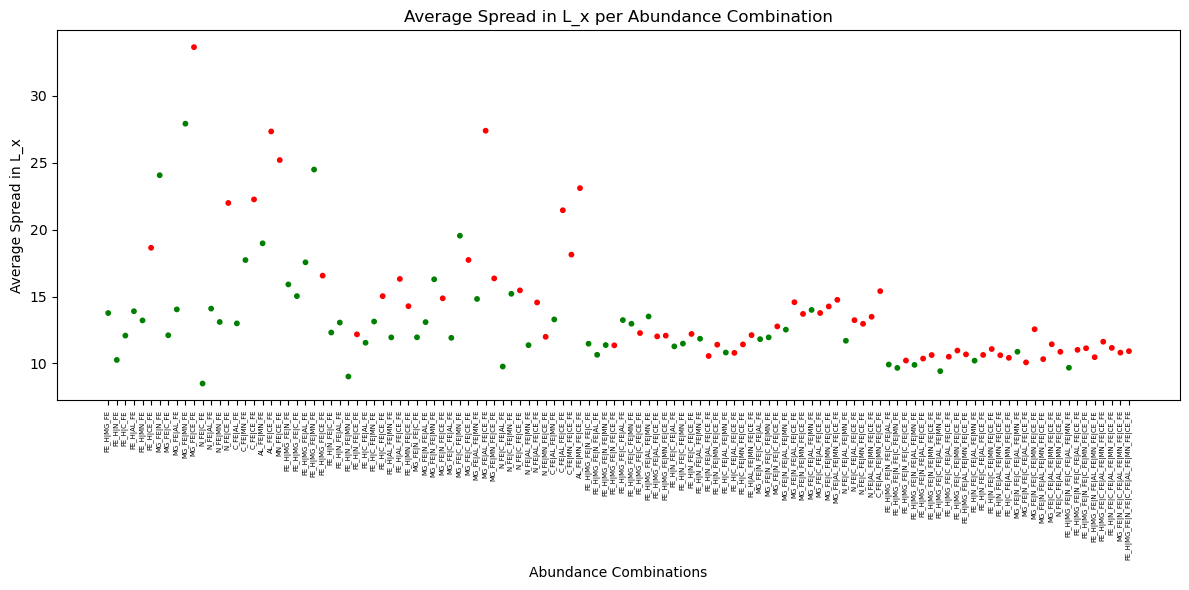

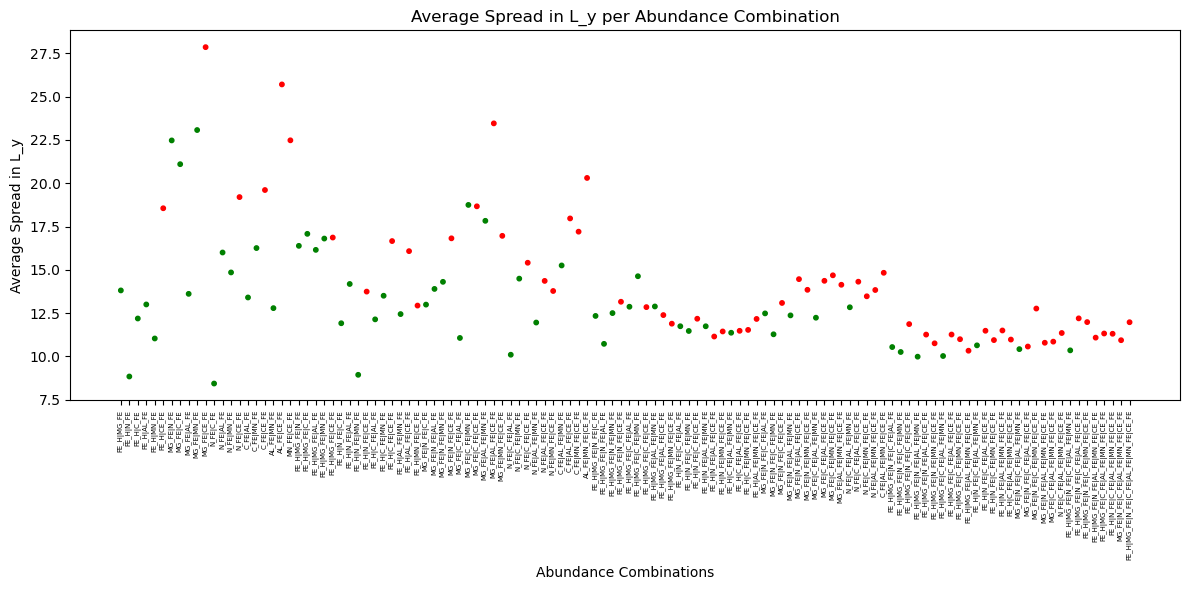

In [95]:

for col in spread_summary.columns:
    if col == 'combo_tag':  # avoid printing a plot with combo tag vs. combo tag
        continue  # skip this column
    plt.figure(figsize=(12, 6))
    x_labels = spread_summary['combo_tag'].tolist() # adds each combination of abundances to a list that becomes the x values
    y_values = spread_summary[col].values # extracts the values from the specified column and assigns them as the y value

    point_colors = ['red' if 'CE_FE' in str(tag) else 'green' for tag in x_labels] # makes the points corresponding to abundance combos with Ce show up in red and all others show up in green
    
    plt.scatter(x_labels, y_values, color=point_colors, s=10)
    plt.xticks(rotation=90, fontsize=5)
    plt.xlabel("Abundance Combinations")
    plt.ylabel(f"Average Spread in {col}") # flexible name that changes for each property
    plt.title(f"Average Spread in {col} per Abundance Combination")
    plt.tight_layout()
    plt.show()

In [294]:
print(repr(spread_summary.columns.tolist()))

['combo_tag', 'E', 'R_guide', 'ecc', 'z_max', 'J_R', 'J_z', 'L_z', 'L_x', 'L_y']


#### finding the fit for the results

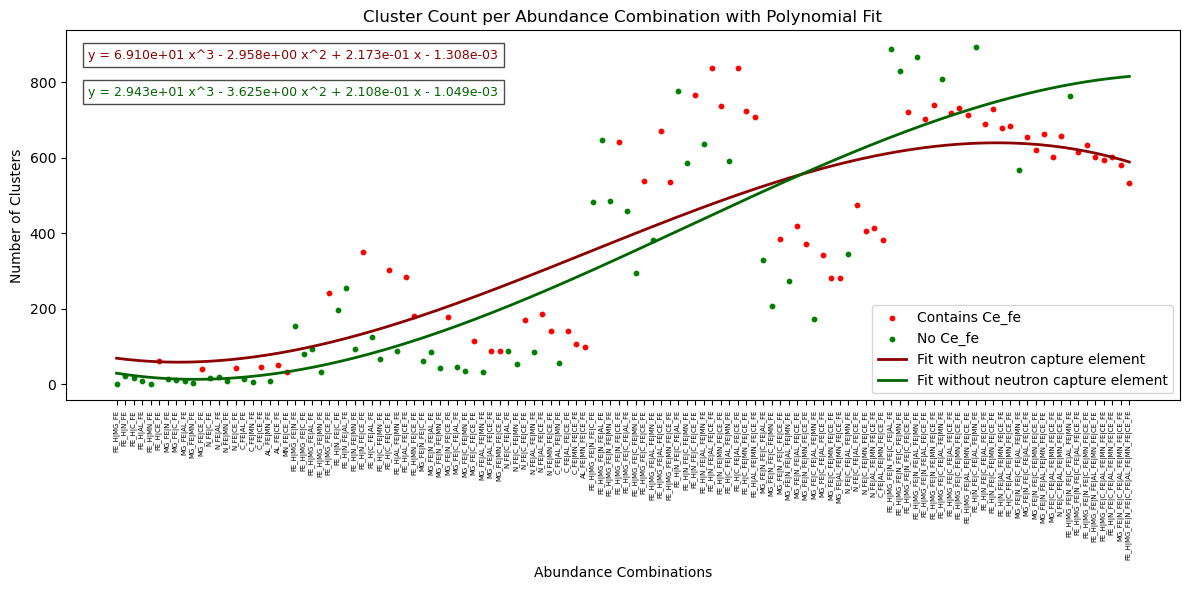

In [103]:
# Convert x_labels to numeric indices
x_labels = list(cluster_counts.keys()) # assigns the names of combinations of abundances as the x-axis
x_numeric = np.arange(len(x_labels))
y_values = np.array(list(cluster_counts.values()))

# Split data by color
red_x, red_y = [],[]
green_x, green_y = [],[]

for i, tag in enumerate(x_labels):
    if 'CE_FE' in tag:
        red_x.append(x_numeric[i])
        red_y.append(y_values[i])
    else:
        green_x.append(x_numeric[i])
        green_y.append(y_values[i])

# Fit 3rd-degree polynomial
red_poly = Polynomial.fit(red_x, red_y, deg=3)
green_poly = Polynomial.fit(green_x, green_y, deg=3)

# Evaluate fits on smoother x-values
x_fit = np.linspace(0, len(x_labels) - 1, 500)
red_fit_y = red_poly(x_fit)
green_fit_y = green_poly(x_fit)

# Extract polynomial coefficients in standard form for equation display
red_coefs = red_poly.convert().coef
green_coefs = green_poly.convert().coef

def format_poly_eq(coefs):
    terms = []
    degree = len(coefs) - 1
    for i, c in enumerate(coefs):
        power = degree - i
        if abs(c) < 1e-12:
            continue
        sign = '+' if c > 0 else '-'
        c_abs = abs(c)
        if power == 0:
            term = f"{c_abs:.3e}"
        elif power == 1:
            term = f"{c_abs:.3e} x"
        else:
            term = f"{c_abs:.3e} x^{power}"
        terms.append(f" {sign} {term}")
    eq = ''.join(terms)
    # Fix leading plus sign:
    if eq.startswith(' +'):
        eq = eq[2:]
    return "y =" + eq

red_eq = format_poly_eq(red_coefs)
green_eq = format_poly_eq(green_coefs)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(red_x, red_y, color='red', s=10, label='Contains Ce_fe')
plt.scatter(green_x, green_y, color='green', s=10, label='No Ce_fe')
plt.plot(x_fit, red_fit_y, color='darkred', linewidth=2, label='Fit with neutron capture element')
plt.plot(x_fit, green_fit_y, color='darkgreen', linewidth=2, label='Fit without neutron capture element')
plt.xticks(ticks=x_numeric, labels=x_labels, rotation=90, fontsize=5)
plt.xlabel("Abundance Combinations")
plt.ylabel("Number of Clusters")
plt.title("Cluster Count per Abundance Combination with Polynomial Fit")
plt.legend(loc='lower right')

# Add equation texts to the plot (top-left and top-right)
plt.text(0.02, 0.95, red_eq, transform=plt.gca().transAxes, fontsize=9,
         color='darkred', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
plt.text(0.02, 0.85, green_eq, transform=plt.gca().transAxes, fontsize=9,
         color='darkgreen', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

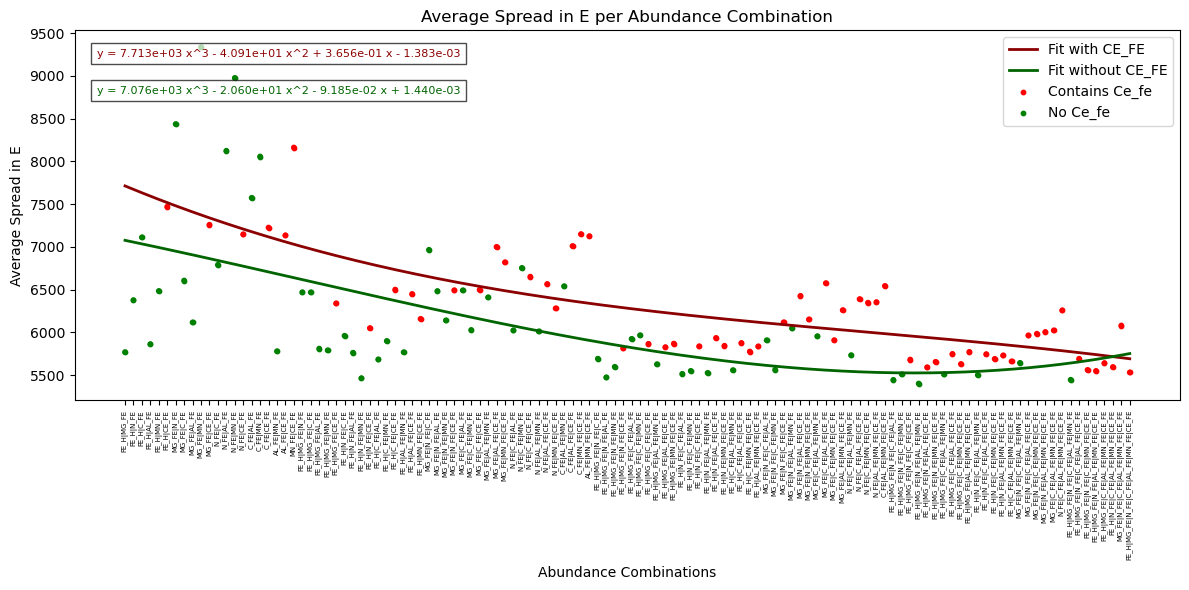

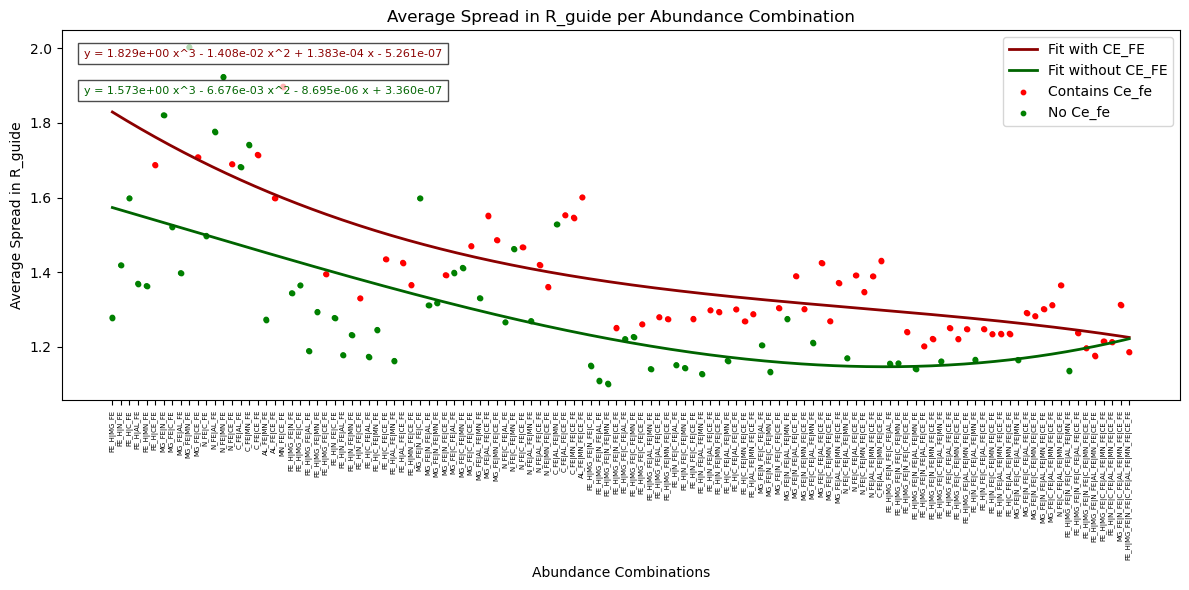

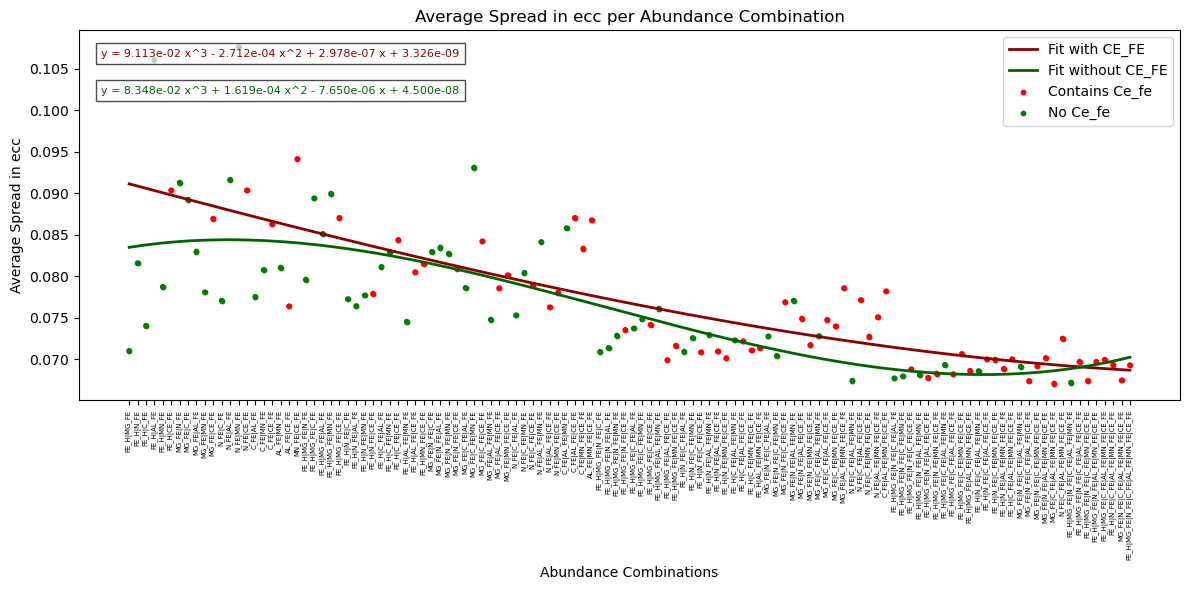

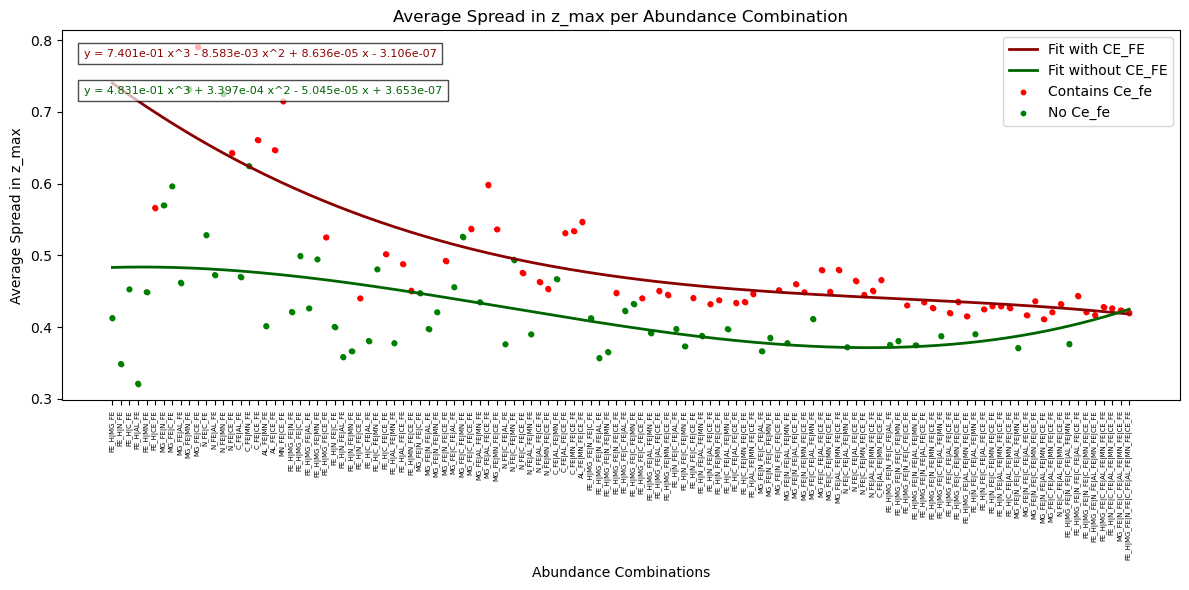

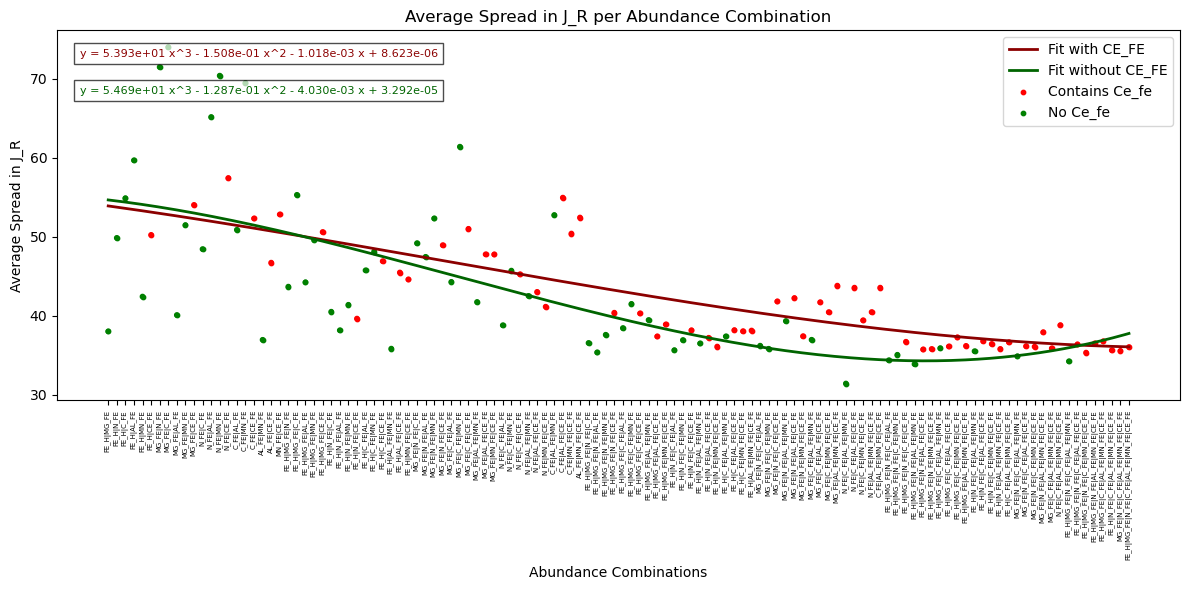

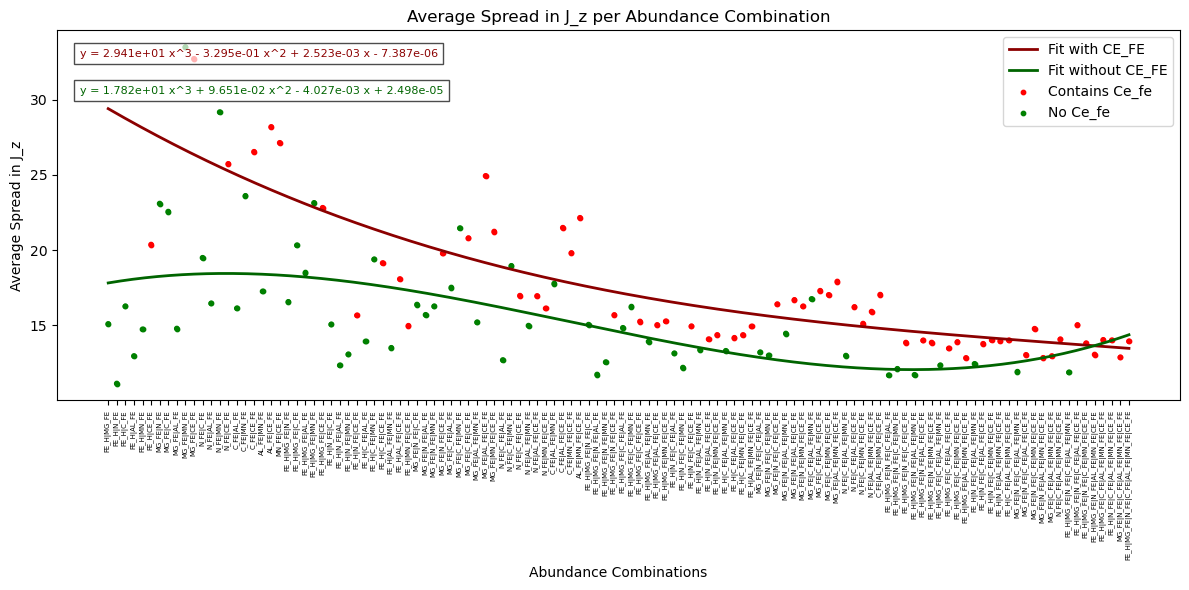

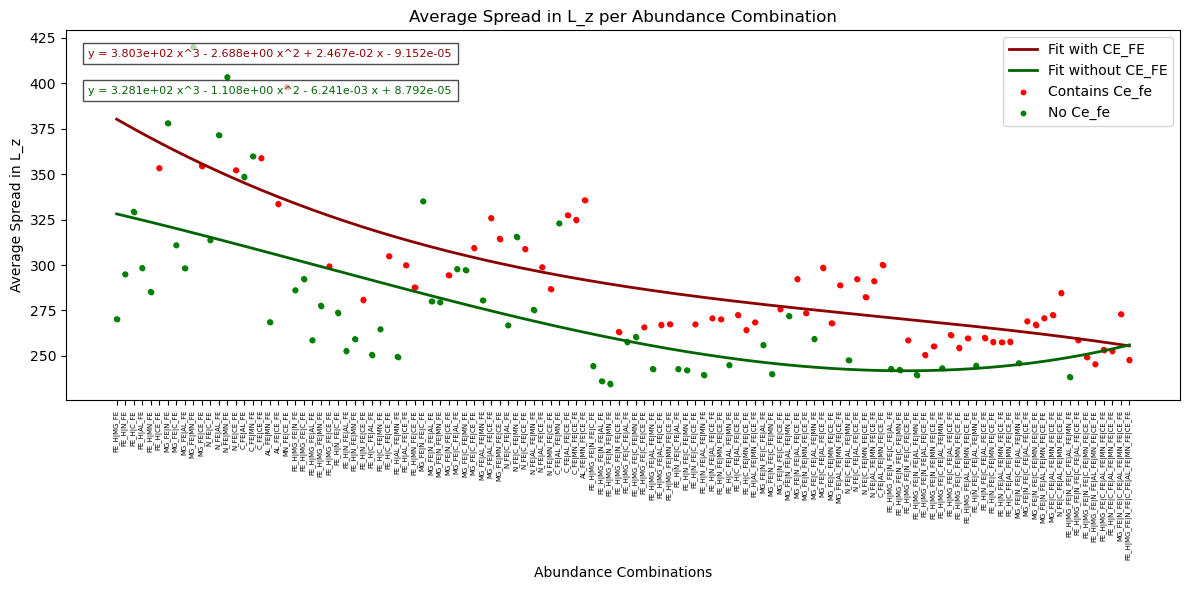

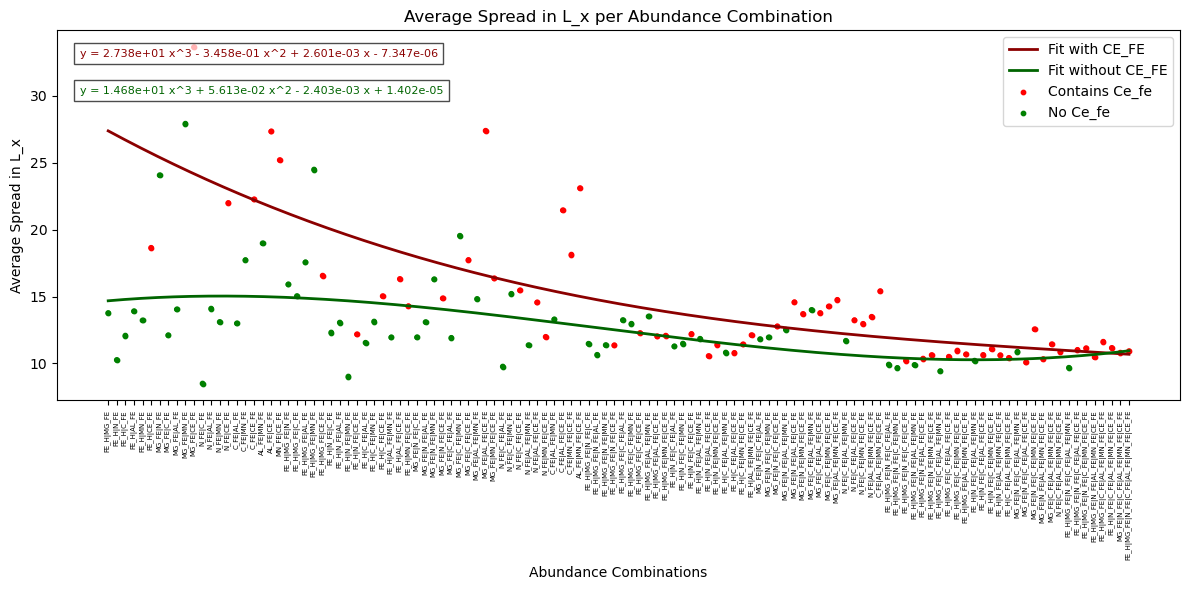

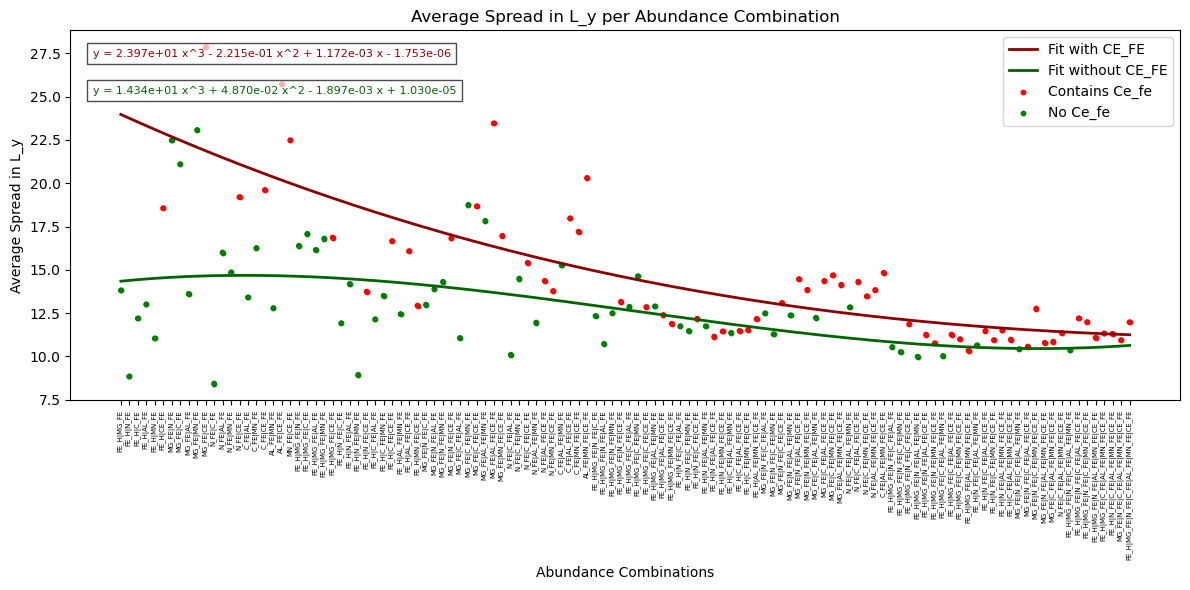

In [115]:
for col in spread_summary.columns:
    if col == 'combo_tag':
        continue  # skip combo_tag column

    plt.figure(figsize=(12, 6))
    
    x_labels = spread_summary['combo_tag'].tolist()
    y_values = spread_summary[col].values

    x_numeric = np.arange(len(x_labels))

    # Split data by color
    red_x, red_y = [], []
    green_x, green_y = [], []

    for i, tag in enumerate(x_labels):
        if 'CE_FE' in str(tag):
            red_x.append(x_numeric[i])
            red_y.append(y_values[i])
        else:
            green_x.append(x_numeric[i])
            green_y.append(y_values[i])

    # Fit 3rd-degree polynomial where data exists
    red_poly = None
    green_poly = None
    if len(red_x) >= 4:
        red_poly = Polynomial.fit(red_x, red_y, deg=3)
    if len(green_x) >= 4:
        green_poly = Polynomial.fit(green_x, green_y, deg=3)

    x_fit = np.linspace(0, len(x_labels) - 1, 500)

    # Evaluate polynomial fits
    red_fit_y = red_poly(x_fit) if red_poly else None
    green_fit_y = green_poly(x_fit) if green_poly else None

    # Prepare polynomial equations for display
    def format_poly_eq(coefs):
        terms = []
        degree = len(coefs) - 1
        for i, c in enumerate(coefs):
            power = degree - i
            if abs(c) < 1e-12:
                continue
            sign = '+' if c > 0 else '-'
            c_abs = abs(c)
            if power == 0:
                term = f"{c_abs:.3e}"
            elif power == 1:
                term = f"{c_abs:.3e} x"
            else:
                term = f"{c_abs:.3e} x^{power}"
            terms.append(f" {sign} {term}")
        eq = ''.join(terms)
        if eq.startswith(' +'):
            eq = eq[2:]
        return "y =" + eq

    red_eq = format_poly_eq(red_poly.convert().coef) if red_poly else "Not enough red points to fit"
    green_eq = format_poly_eq(green_poly.convert().coef) if green_poly else "Not enough green points to fit"

    # Scatter plot
    point_colors = ['red' if 'CE_FE' in str(tag) else 'green' for tag in x_labels]
    plt.scatter(x_numeric, y_values, color=point_colors, s=10)

    # Plot polynomial fits
    if red_fit_y is not None:
        plt.plot(x_fit, red_fit_y, color='darkred', linewidth=2, label='Fit with CE_FE')
    if green_fit_y is not None:
        plt.plot(x_fit, green_fit_y, color='darkgreen', linewidth=2, label='Fit without CE_FE')

    plt.scatter(red_x, red_y, color='red', s=10, label='Contains Ce_fe')
    plt.scatter(green_x, green_y, color='green', s=10, label='No Ce_fe')
    
    # Set x-axis labels
    plt.xticks(ticks=x_numeric, labels=x_labels, rotation=90, fontsize=5)

    plt.xlabel("Abundance Combinations")
    plt.ylabel(f"Average Spread in {col}")
    plt.title(f"Average Spread in {col} per Abundance Combination")
    plt.legend(loc='upper right')

    # Add equation text in upper left, separated vertically
    plt.text(0.02, 0.95, red_eq, transform=plt.gca().transAxes, fontsize=8,
             color='darkred', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
    plt.text(0.02, 0.85, green_eq, transform=plt.gca().transAxes, fontsize=8,
             color='darkgreen', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

    plt.tight_layout()
    plt.show()

Average percent difference between fits: 37.41%


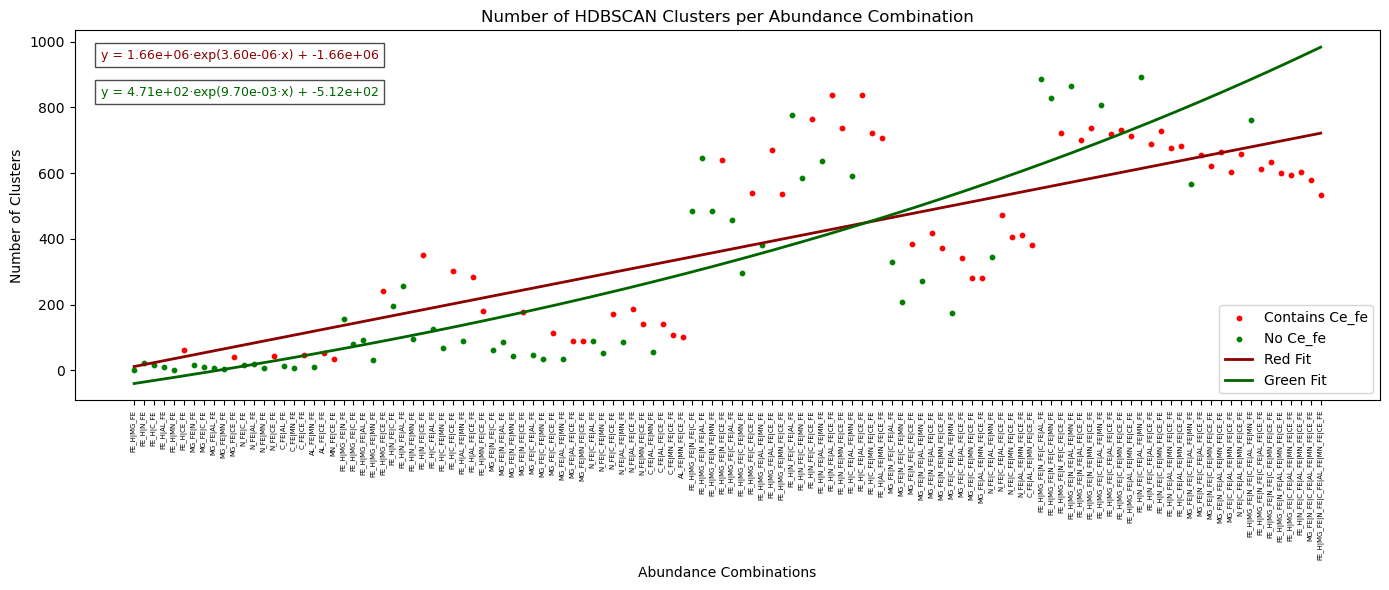

In [132]:
from scipy.optimize import curve_fit

# Define exponential function
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Prepare data
x_labels = list(cluster_counts.keys())
y_values = list(cluster_counts.values())
x_numeric = np.arange(len(x_labels))  # transforms the element combos into numeric x values for fitting
y_values = np.array(y_values)

# Split by CE_FE
red_x, red_y = [], []
green_x, green_y = [], []

# add each tag to the correct group based on whether or not it contains a neutron capture element
for i, tag in enumerate(x_labels):
    if 'CE_FE' in tag:
        red_x.append(x_numeric[i])
        red_y.append(y_values[i])
    else:
        green_x.append(x_numeric[i])
        green_y.append(y_values[i])

# Fit exponential model
x_fit = np.linspace(0, len(x_labels)-1, 500)

if len(red_x) >= 3: # checks that there are at least 3 data points to ensure that the model can be fit
    popt_red, _ = curve_fit(exp_func, red_x, red_y, p0=(1, 1e-6, 1), maxfev=10000) # calls curve fit to run the previously defined function on the red data
    red_fit_y = exp_func(x_fit, *popt_red) 
    red_eq = f"y = {popt_red[0]:.2e}·exp({popt_red[1]:.2e}·x) + {popt_red[2]:.2e}" # formats the fitting parameters into a readable notation

if len(green_x) >= 3:
    popt_green, _ = curve_fit(exp_func, green_x, green_y, p0=(1, 1e-6, 1), maxfev=10000)
    green_fit_y = exp_func(x_fit, *popt_green)
    green_eq = f"y = {popt_green[0]:.2e}·exp({popt_green[1]:.2e}·x) + {popt_green[2]:.2e}"

# ---- Percent difference calculation ----
if popt_red is not None and popt_green is not None:
    # Calculate percent difference across the same x_fit range
    y_red = exp_func(x_fit, *popt_red)
    y_green = exp_func(x_fit, *popt_green)

    percent_diff = (y_green - y_red) / y_red * 100  # relative to red
    avg_percent_diff = np.mean(np.abs(percent_diff))
    print(f"Average percent difference between fits: {avg_percent_diff:.2f}%") #prints the result

# Create the scatter plot
plt.figure(figsize=(14, 6))
point_colors = ['red' if 'CE_FE' in tag else 'green' for tag in x_labels]
plt.scatter(red_x, red_y, color='red', s=10, label='Contains Ce_fe')
plt.scatter(green_x, green_y, color='green', s=10, label='No Ce_fe')

# Plot fits
plt.plot(x_fit, red_fit_y, color='darkred', linewidth=2, label='Red Fit')
plt.text(0.02, 0.95, red_eq, transform=plt.gca().transAxes, fontsize=9,
             color='darkred', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

plt.plot(x_fit, green_fit_y, color='darkgreen', linewidth=2, label='Green Fit')
plt.text(0.02, 0.85, green_eq, transform=plt.gca().transAxes, fontsize=9,
             color='darkgreen', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Format x-axis with original labels
plt.xticks(ticks=x_numeric, labels=x_labels, rotation=90, fontsize=5)
plt.xlabel("Abundance Combinations")
plt.ylabel("Number of Clusters")
plt.title("Number of HDBSCAN Clusters per Abundance Combination")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

Average percent difference between fits: 6.74%


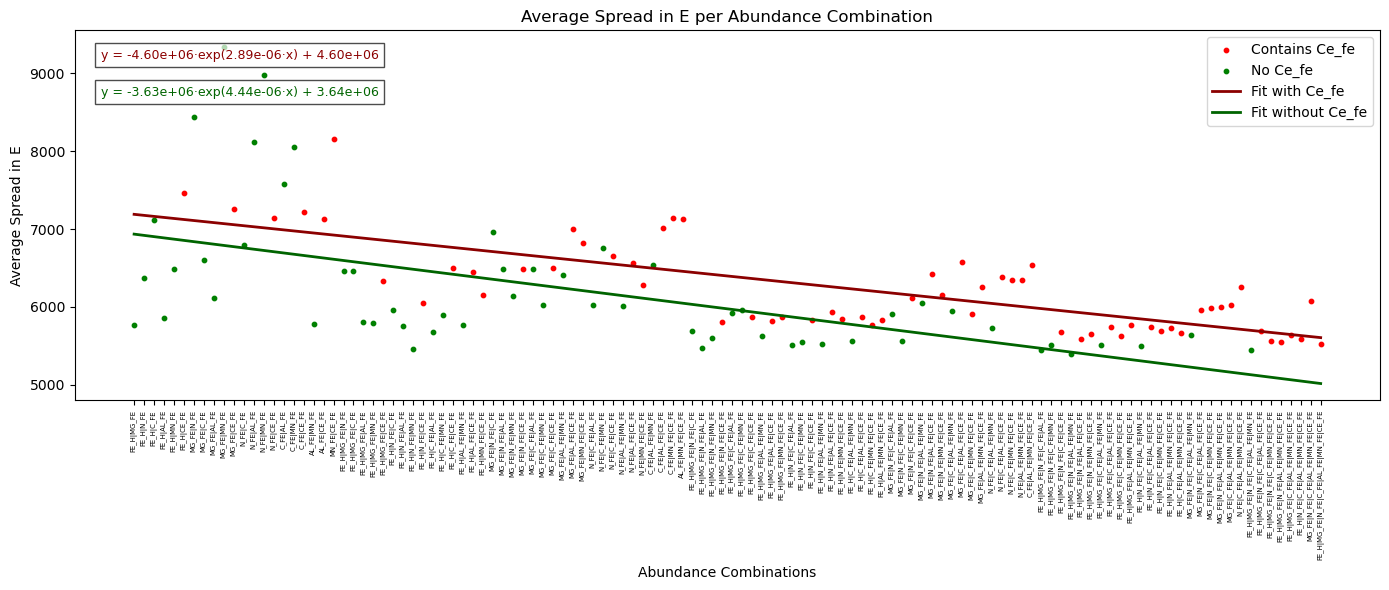

Average percent difference between fits: 10.27%


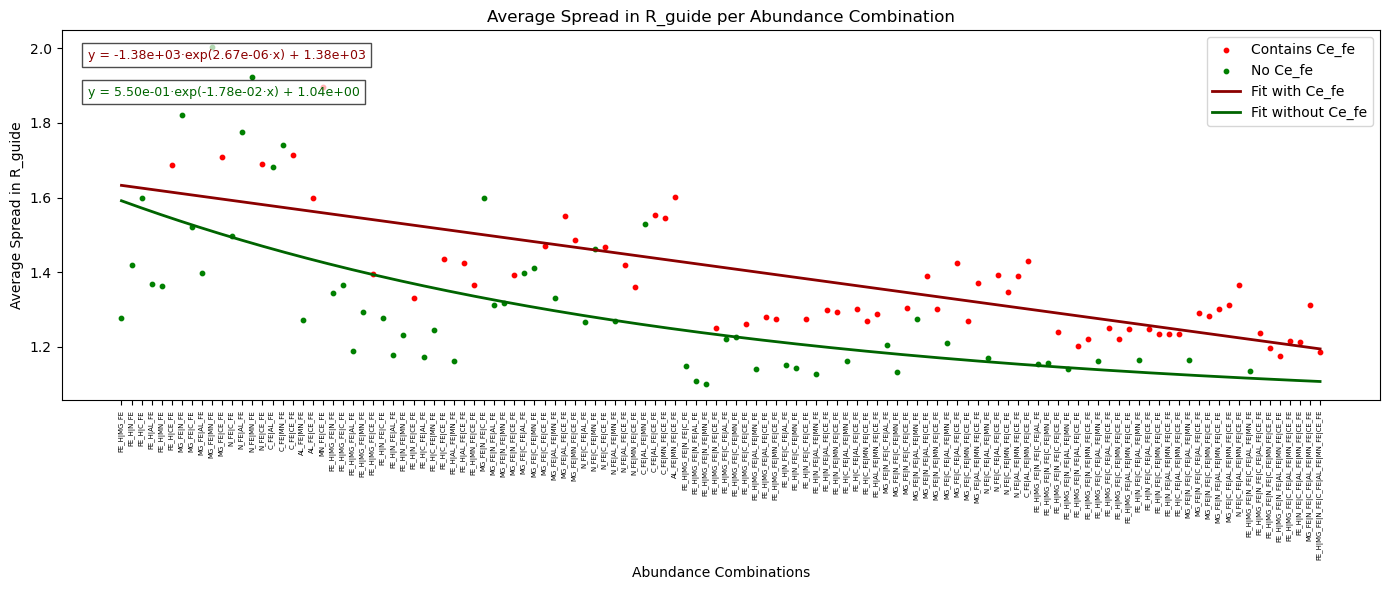

Average percent difference between fits: 2.53%


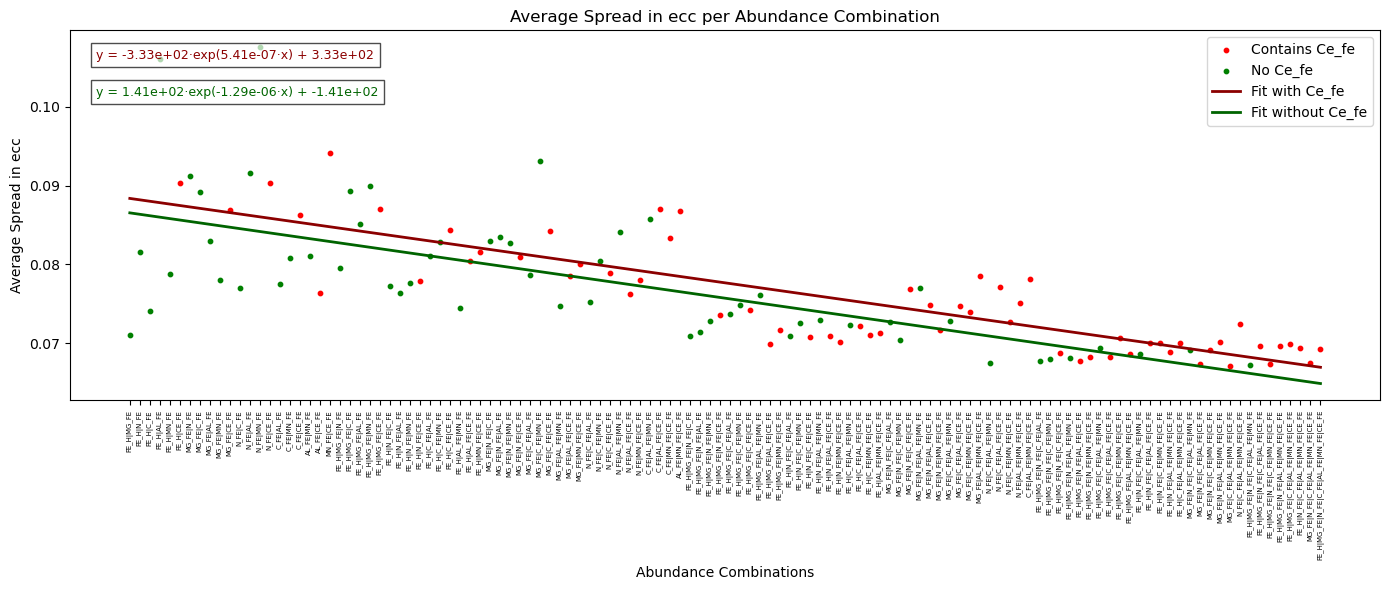

Average percent difference between fits: 16.67%


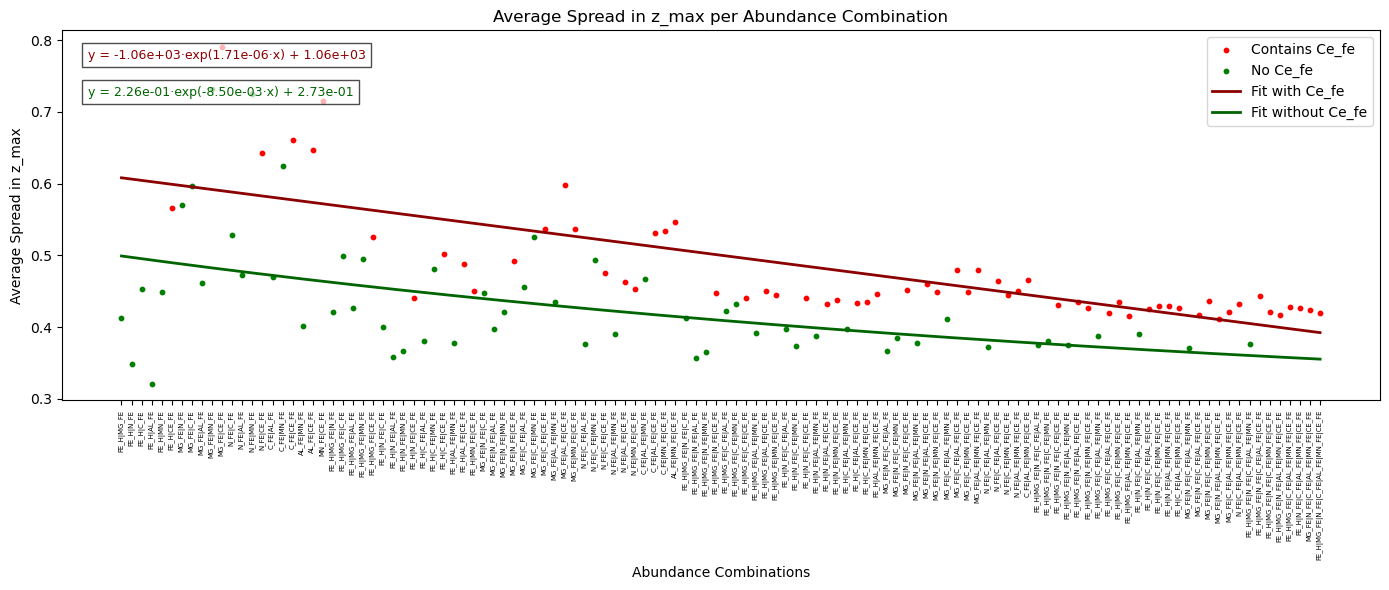

Average percent difference between fits: 6.47%


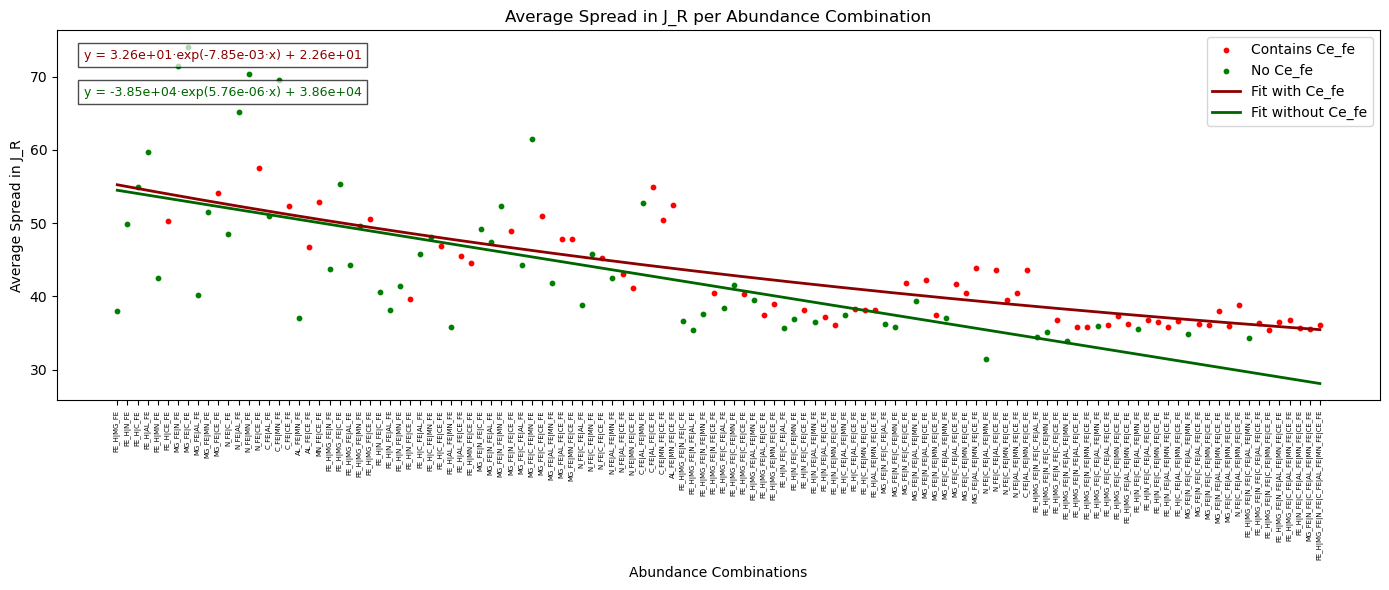

Average percent difference between fits: 18.88%


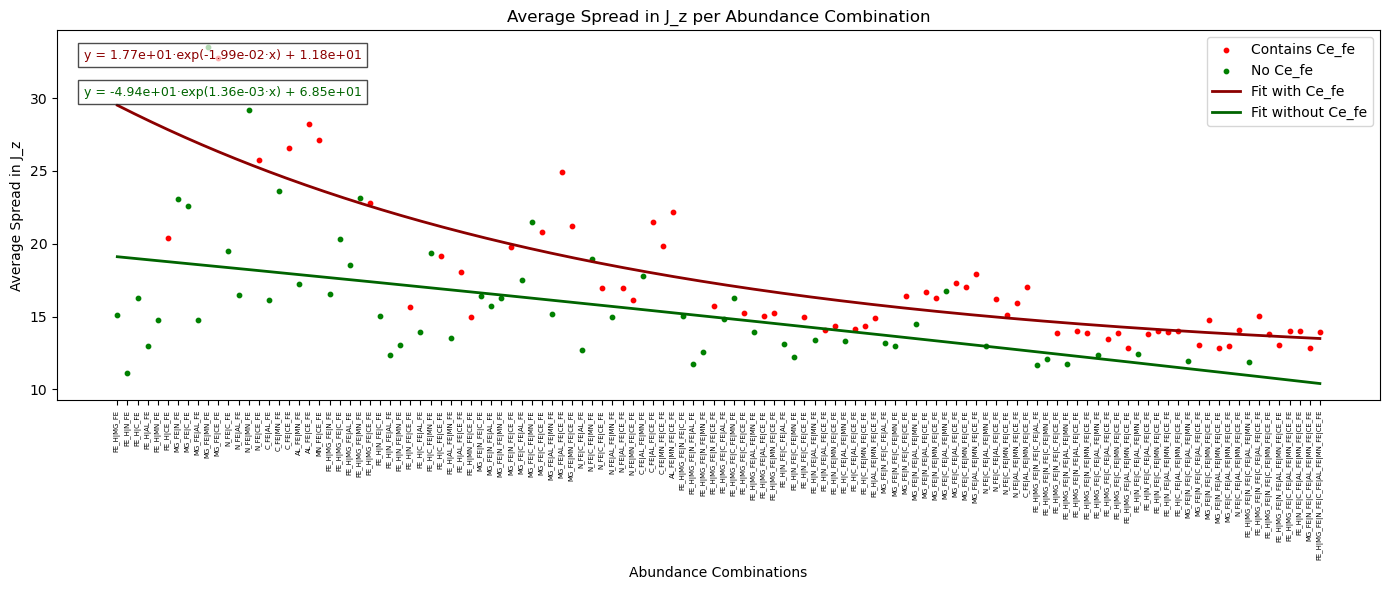

Average percent difference between fits: 10.16%


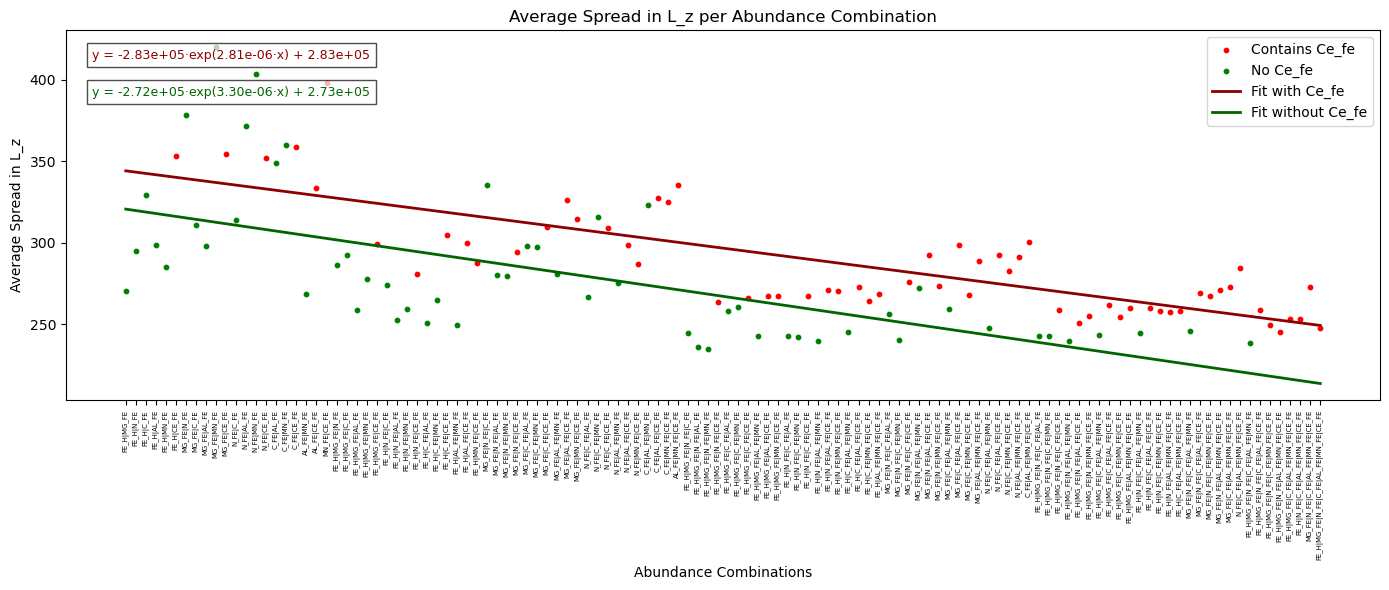

Average percent difference between fits: 18.80%


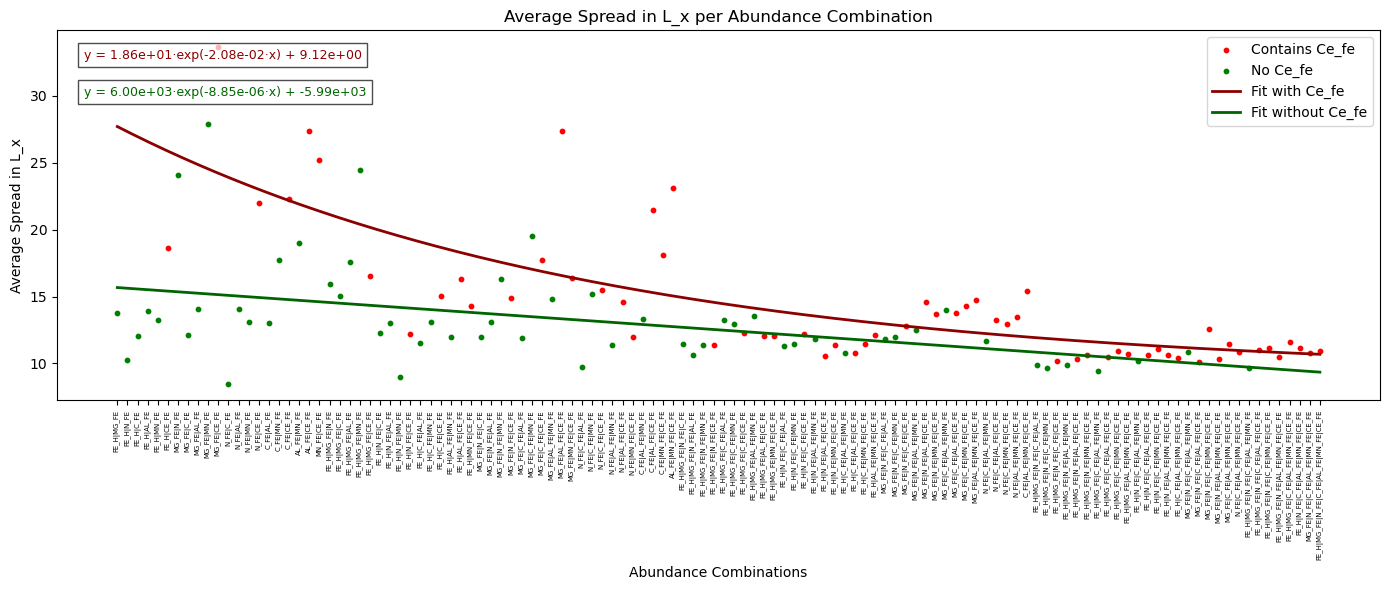

Average percent difference between fits: 17.10%


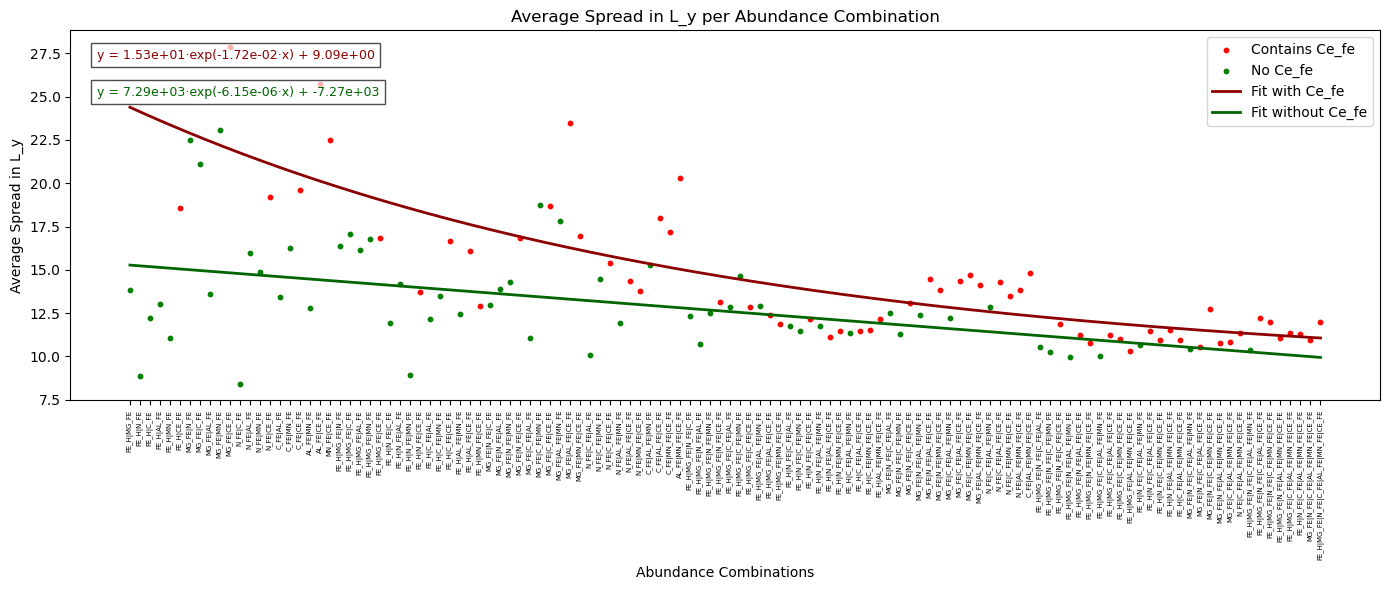

In [134]:
for col in spread_summary.columns:
    if col == 'combo_tag':
        continue  # skip combo_tag column
    # Prepare data
    x_labels = spread_summary['combo_tag'].tolist() # adds ea
    y_values = spread_summary[col].values
    x_numeric = np.arange(len(x_labels))  # numeric x for fitting
    y_values = np.array(y_values)
    
    # Split by CE_FE
    red_x, red_y = [], []
    green_x, green_y = [], []
    
    for i, tag in enumerate(x_labels):
        if 'CE_FE' in tag:
            red_x.append(x_numeric[i])
            red_y.append(y_values[i])
        else:
            green_x.append(x_numeric[i])
            green_y.append(y_values[i])
    
    # Fit exponential model
    x_fit = np.linspace(0, len(x_labels)-1, 500)
    
    if len(red_x) >= 3:
        popt_red, _ = curve_fit(exp_func, red_x, red_y, p0=(1, 1e-6, 1), maxfev=10000)
        red_fit_y = exp_func(x_fit, *popt_red)
        red_eq = f"y = {popt_red[0]:.2e}·exp({popt_red[1]:.2e}·x) + {popt_red[2]:.2e}"
    
    if len(green_x) >= 3:
        popt_green, _ = curve_fit(exp_func, green_x, green_y, p0=(1, 1e-6, 1), maxfev=10000)
        green_fit_y = exp_func(x_fit, *popt_green)
        green_eq = f"y = {popt_green[0]:.2e}·exp({popt_green[1]:.2e}·x) + {popt_green[2]:.2e}"

    # ---- Percent difference calculation ----
    if popt_red is not None and popt_green is not None:
        # Calculate percent difference across the same x_fit range
        y_red = exp_func(x_fit, *popt_red)
        y_green = exp_func(x_fit, *popt_green)

    percent_diff = (y_green - y_red) / y_red * 100  # relative to red
    avg_percent_diff = np.mean(np.abs(percent_diff))
    print(f"Average percent difference between fits: {avg_percent_diff:.2f}%")
    
    # Create the scatter plot
    plt.figure(figsize=(14, 6))
    point_colors = ['red' if 'CE_FE' in tag else 'green' for tag in x_labels]
    plt.scatter(red_x, red_y, color='red', s=10, label='Contains Ce_fe')
    plt.scatter(green_x, green_y, color='green', s=10, label='No Ce_fe')
    
    # Plot fits
    plt.plot(x_fit, red_fit_y, color='darkred', linewidth=2, label='Fit with Ce_fe')
    plt.text(0.02, 0.95, red_eq, transform=plt.gca().transAxes, fontsize=9,
                 color='darkred', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
    
    plt.plot(x_fit, green_fit_y, color='darkgreen', linewidth=2, label='Fit without Ce_fe')
    plt.text(0.02, 0.85, green_eq, transform=plt.gca().transAxes, fontsize=9,
                 color='darkgreen', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
    
    # Format x-axis with original labels
    plt.xticks(ticks=x_numeric, labels=x_labels, rotation=90, fontsize=5)
    plt.xlabel("Abundance Combinations")
    plt.ylabel(f"Average Spread in {col}")
    plt.title(f"Average Spread in {col} per Abundance Combination")
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()